**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Imelda Ndjampou fokwe <br/>
Student Number: 300225681

Name:  Exaucee mbuyi <br/>
Student Number: 300268093


lien vers le document :https://colab.research.google.com/drive/1rz3ItRH7B18APJlS96oqcZ08AXbQLAwI?usp=sharing

## 1. Analyse exploratoire

### Chargement de l'ensemble de données

Un ensemble de données a été créé pour ce devoir. Il est disponible sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Vous devez accéder à l'ensemble de données et le lire directement à partir de ce dépôt GitHub dans votre notebook Jupyter.

Utilisez cette cellule de code pour vos directives `import` et autres initialisations.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,make_scorer

# 1. **Charger l'ensemble de données** :

Écrivez du code pour charger les trois ensembles de données.


In [ ]:
#chargement des données
url_cb513_test = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_test.csv"
dataset_test = pd.read_csv(url_cb513_test)
print("\nTest Data:")
print(dataset_test.head())
url_cb513_train = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_train.csv"
dataset_train = pd.read_csv(url_cb513_train)
print("Train Data:")
print(dataset_train.head())
url_cb513_valid = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_valid.csv"
dataset_valid = pd.read_csv(url_cb513_valid)
print("\nValidation Data:")
print(dataset_valid.head())




Test Data:
   2       0  0.1     0.2     0.3     0.4     0.6     0.7     0.8  0.9  ...  \
0  1  0.1111  0.0  0.0000  0.0000  0.2222  0.1111  0.0000  0.0000  0.0  ...   
1  1  0.3750  0.0  0.0625  0.0000  0.0312  0.0312  0.0625  0.0312  0.0  ...   
2  1  0.4516  0.0  0.0000  0.0000  0.0000  0.2742  0.0000  0.0806  0.0  ...   
3  0  0.0000  0.0  0.0625  0.0312  0.0000  0.7500  0.0000  0.0000  0.0  ...   
4  2  0.0000  0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0  ...   

    0.409   0.410   0.411  0.375.3   0.412   0.413  0.414  0.415   0.416  \
0  0.0000  0.0000  0.0000   0.0000  0.0000  1.0000    0.0    0.0  0.0000   
1  0.0312  0.0312  0.0312   0.0312  0.0000  0.0625    0.0    0.0  0.0000   
2  0.0000  0.0000  0.0000   0.0000  0.0000  0.0000    0.0    0.0  0.0161   
3  0.0938  0.0000  0.1562   0.1250  0.0000  0.0312    0.0    0.0  0.0000   
4  0.1333  0.1333  0.1333   0.0000  0.0667  0.0667    0.0    0.0  0.0000   

   0.417  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4

### Prétraitement des données

# 2. **Brasser les lignes** :

Étant donné que les exemples sont générés en faisant glisser une fenêtre sur chaque séquence de protéines, la plupart des exemples adjacents proviennent de la même protéine et partagent 20 positions. Pour atténuer l'impact potentiel négatif sur l'entraînement du modèle, la première étape consiste à brasser (*shuffle*) les **lignes** de la matrice de données.


In [ ]:
# Brasser les lignes des jeux de données
dataset_train = shuffle(dataset_train).reset_index(drop=True)
print("Shuffled Train Data:")
print(dataset_train.head())
dataset_test = shuffle(dataset_test).reset_index(drop=True)
print("\nShuffled Test Data:")
print(dataset_test.head())
dataset_valid = shuffle(dataset_valid).reset_index(drop=True)
print("\nShuffled Validation Data:")
print(dataset_valid.head())

Shuffled Train Data:
   2       0  0.0556     0.1  0.0556.1  0.1111     0.2  0.0556.2     0.3  \
0  2  0.0000     0.0  0.0000    0.0000  0.0556  0.0000    0.0000  0.0000   
1  2  0.0000     0.0  0.1316    0.0789  0.0000  0.2368    0.0000  0.0000   
2  2  0.0000     0.0  0.0000    0.0000  0.0000  0.0000    0.0000  0.0000   
3  0  0.0000     0.0  0.0208    0.0000  0.0833  0.0000    0.0000  0.0000   
4  0  0.0385     0.0  0.0385    0.0385  0.0385  0.0641    0.0385  0.0513   

      0.4  ...  0.1667.17  0.2222.12  0.295   0.296  0.1667.18   0.297  \
0  0.1111  ...     0.0000     0.0000    0.0  0.0000     0.0000  0.0000   
1  0.1053  ...     0.0263     0.0000    0.0  0.0000     0.0263  0.0000   
2  0.0000  ...     0.0000     0.0000    0.0  0.0000     0.0000  0.0000   
3  0.0000  ...     0.1458     0.0000    0.0  0.0208     0.0000  0.3125   
4  0.0256  ...     0.0513     0.0128    0.0  0.0769     0.2308  0.0897   

    0.298   0.299   0.300  0.301  
0  0.0000  0.0000  0.0000    0.0  
1  0.00

# Analyse des résultats :
Dans le code, le brassage des lignes est effectué pour les ensembles de données d'entraînement, de test et de validation à l'aide de la fonction shuffle de sklearn.utils. Après avoir brassé les lignes, les index sont réinitialisés avec reset_index(drop=True) pour garantir une continuité dans les index, ce qui rend l'accès aux données plus simple et plus cohérent.

Voici ce que cela implique pour chaque ensemble :

* **Ensemble d'entraînement (dataset_train)** :
Le brassage assure que les exemples d'entraînement sont diversifiés et ne suivent pas un ordre artificiel. Cela est crucial pour la formation du modèle, car il permet une exposition uniforme à la diversité des données.

* **Ensemble de test (dataset_test)** :
Bien que le brassage de l'ensemble de test ne soit pas toujours nécessaire, cela permet d’éviter les effets de séquence lors de l’évaluation des performances du modèle. Ainsi, les mesures de précision, de rappel et de score F1 ne sont pas influencées par un ordre artificiel des données.

* **Ensemble de validation (dataset_valid)** :
Le brassage des données de validation est également utile pour obtenir une estimation plus précise de la performance généralisée du modèle en cours d'entraînement. Cela garantit que le modèle est évalué de manière équilibrée sur un ensemble représentatif des données pendant l’entraînement.



# 3. **Mise à l'échelle des caractéristiques numériques** :

Étant donné que les 462 caractéristiques sont des proportions représentées par des valeurs comprises entre 0 et 1, la mise à l'échelle peut ne pas être nécessaire. Dans nos évaluations, l'utilisation de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) a en fait dégradé les performances du modèle. Dans votre flux de traitement, comparez les effets de ne pas mettre à l'échelle les données par rapport à l'application de [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Par souci de temps, une seule expérience suffira. Il est important de noter que lorsque la mise à l'échelle est appliquée, une méthode uniforme doit être utilisée pour toutes les colonnes, compte tenu de leur nature homogène.

In [ ]:
# Supposons que les 462 caractéristiques sont dans les colonnes 0 à 461
features_train = dataset_train.iloc[:, :462]
features_test = dataset_test.iloc[:, :462]
features_valid = dataset_valid.iloc[:, :462]

# Vérifions que les colonnes des jeux de données sont les mêmes
common_columns = features_train.columns.intersection(features_test.columns).intersection(features_valid.columns)

# Utilisons uniquement les colonnes communes
features_train = features_train[common_columns]
features_test = features_test[common_columns]
features_valid = features_valid[common_columns]

# Appliquons le StandardScaler sur les colonnes alignées
scaler_standard = StandardScaler()
features_train_standard = scaler_standard.fit_transform(features_train)
features_test_standard = scaler_standard.transform(features_test)
features_valid_standard = scaler_standard.transform(features_valid)

# Conversion en numpy array pour ignorer les noms des colonnes
features_train_array = features_train.values
features_test_array = features_test.values
features_valid_array = features_valid.values

# Application du StandardScaler
scaler_standard = StandardScaler()
features_train_standard = scaler_standard.fit_transform(features_train_array)
features_test_standard = scaler_standard.transform(features_test_array)
features_valid_standard = scaler_standard.transform(features_valid_array)

# Affichage des données normalisées avec StandardScaler
print("Données normalisées avec StandardScaler :")
print("features_train_standard (5 premières lignes) :\n", features_train_standard[:5])
print("features_test_standard (5 premières lignes) :\n", features_test_standard[:5])
print("features_valid_standard (5 premières lignes) :\n", features_valid_standard[:5])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
features_train_minmax = scaler_minmax.fit_transform(features_train)
features_test_minmax = scaler_minmax.transform(features_test)
features_valid_minmax = scaler_minmax.transform(features_valid)

# Affichage des données mises à l'échelle avec MinMaxScaler
print("\nDonnées mises à l'échelle avec MinMaxScaler :")
print("features_train_minmax (5 premières lignes) :\n", features_train_minmax[:5])
print("features_test_minmax (5 premières lignes) :\n", features_test_minmax[:5])
print("features_valid_minmax (5 premières lignes) :\n", features_valid_minmax[:5])


Données normalisées avec StandardScaler :
features_train_standard (5 premières lignes) :
 [[ 1.08591696 -0.47508775 -0.36754595 ... -0.15913096 -0.2761635
  -0.29911066]
 [ 1.08591696 -0.47508775  0.48279445 ... -0.15913096 -0.2761635
  -0.29911066]
 [ 1.08591696 -0.47508775 -0.36754595 ... -0.15913096 -0.2761635
  -0.29911066]
 [-1.17719463 -0.47508775 -0.23314564 ... -0.15913096 -0.2761635
   1.16013249]
 [-1.17719463 -0.24963817 -0.11877615 ...  0.13122441  0.02786493
  -0.1870632 ]]
features_test_standard (5 premières lignes) :
 [[ 1.08591696 -0.47508775 -0.36754595 ... -0.15913096 -0.2761635
  -0.29911066]
 [-1.17719463  0.25689141 -0.36754595 ... -0.15913096  0.05313483
  -0.29911066]
 [ 1.08591696  0.77981731 -0.36754595 ... -0.15913096 -0.2761635
  -0.29911066]
 [ 1.08591696 -0.36851158 -0.32813048 ... -0.08994472 -0.18061171
  -0.29911066]
 [-1.17719463 -0.47508775 -0.36754595 ... -0.15913096 -0.2761635
  -0.29911066]]
features_valid_standard (5 premières lignes) :
 [[ 1.08591

# Analyse des transformations

Le code applique deux types de transformations sur les caractéristiques : StandardScaler et MinMaxScaler.

***1. Normalisation avec StandardScaler***

Le StandardScaler standardise les données pour qu'elles aient une moyenne de 0 et un écart-type de 1. Cette transformation est utile pour les modèles qui sont sensibles à la variance des données et qui supposent des distributions normales.

**Analyse des Résultats :**

* Données d'Entraînement : features_train_standard est le résultat de la normalisation des données d'entraînement. Avec cette normalisation, chaque caractéristique a une moyenne de 0 et un écart-type de 1, ce qui aide les modèles à mieux converger en réduisant la variance.

* Données de Test et de Validation : features_test_standard et features_valid_standard sont transformés en utilisant le même scaler que celui ajusté sur l'ensemble d'entraînement (scaler_standard). Cela garantit que les données de test et de validation sont comparables avec l'entraînement, évitant ainsi les biais dans l'évaluation.

* Avantages : Cette méthode aide à stabiliser les modèles lors de l'apprentissage, en particulier pour les algorithmes qui utilisent des calculs de distance ou qui sont sensibles aux valeurs extrêmes. Par exemple, les réseaux de neurones et les modèles basés sur des distances (KNN, SVM) bénéficient de données standardisées.


***2. Mise à l'Échelle avec MinMaxScaler***

Le MinMaxScaler met les données à l'échelle pour que toutes les caractéristiques soient comprises entre 0 et 1. Cette transformation est utile lorsqu'on souhaite que toutes les caractéristiques soient sur une même échelle, sans pour autant éliminer la forme de la distribution des données.

**Analyse des Résultats :**

* Données d'Entraînement :  features_train_minmax contient les valeurs mises à l'échelle entre 0 et 1. Cela signifie que les caractéristiques ont la même amplitude, ce qui est utile pour certains modèles de machine learning.

* Données de Test et de Validation : features_test_minmax et features_valid_minmax sont également mises à l'échelle en utilisant le scaler ajusté sur les données d'entraînement. Cela garantit que les données de test et de validation suivent la même mise à l'échelle, permettant une comparaison cohérente.

* Avantages : La mise à l'échelle MinMax est particulièrement utile pour les modèles qui utilisent des fonctions d'activation limitées, comme les réseaux de neurones avec des fonctions sigmoid ou relu. Elle aide à limiter les effets de certaines caractéristiques qui pourraient dominer d'autres en raison de leur amplitude.

# 4. **Séparation des cibles et des données** :

Dans les fichiers CSV, les cibles et les données sont combinées. Pour préparer nos expériences d'apprentissage automatique, séparez les données d'entraînement $X$ et le vecteur cible $y$ pour chacun des trois ensembles de données.

In [ ]:
# Séparation des caractéristiques (X) et des cibles (y)
X_train = dataset_train.iloc[:, 1:]  # Toutes les colonnes sauf la dernière
y_train = dataset_train.iloc[:, 0].astype(int)  # Dernière colonne

X_test = dataset_test.iloc[:, 1:]
y_test = dataset_test.iloc[:, 0].astype(int)

X_valid = dataset_valid.iloc[:, 1:]
y_valid = dataset_valid.iloc[:, 0].astype(int)
# Vérification de la séparation
print("Données d'entraînement (X_train):")
print(X_train.head())

print("\nCible d'entraînement (y_train):")
print(y_train.head())

print("\nDonnées de validation (X_valid):")
print(X_valid.head())

print("\nCible de validation (y_valid):")
print(y_valid.head())

print("\nDonnées de test (X_test):")
print(X_test.head())

print("\nCible de test (y_test):")
print(y_test.head())

Données d'entraînement (X_train):
        0  0.0556     0.1  0.0556.1  0.1111     0.2  0.0556.2     0.3     0.4  \
0  0.1429     0.0  0.0000    0.0000  0.0000  0.1429       0.0  0.0000  0.4286   
1  0.0000     0.0  0.2708    0.1667  0.0208  0.0833       0.0  0.0208  0.0208   
2  0.0000     0.0  0.0000    0.3333  0.0000  0.0000       0.0  0.0000  0.3333   
3  0.2222     0.0  0.2778    0.0000  0.0556  0.0000       0.0  0.0000  0.0000   
4  0.0000     0.0  0.0000    0.0000  0.0000  0.0000       0.0  0.0000  0.0000   

   0.1667  ...  0.1667.17  0.2222.12  0.295   0.296  0.1667.18  0.297   0.298  \
0  0.0000  ...     0.0000     0.5714    0.0  0.1429     0.1429   0.00  0.0000   
1  0.0208  ...     0.0000     0.0417    0.0  0.0000     0.0208   0.25  0.0833   
2  0.0000  ...     0.0000     0.0000    0.0  0.0000     0.0000   0.00  0.0000   
3  0.0556  ...     0.1111     0.0000    0.0  0.0000     0.1111   0.00  0.0000   
4  0.5000  ...     0.0000     0.0000    0.0  0.5000     0.0000   0.00  0.0

### Développement et évaluation des modèles

# 5. **Développement de modèle** :

* **Modèle de base** : Implémentez un modèle utilisant le [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Ce modèle ignore les données d'entrée et prédit la classe majoritaire. Un tel modèle est parfois appelé modèle « homme de paille ».

* **Modèle de référence** : Comme modèle de référence, sélectionnez un des algorithmes d'apprentissage automatique précédemment étudiés : arbres de décision, k-plus proches voisins (KNN) ou régression logistique. Utilisez les paramètres par défaut fournis par scikit-learn pour entraîner chaque modèle en tant que modèle de référence.
     

# Pourquoi avez-vous choisi ce classificateur particulier ?

La régression logistique est un modèle de classification linéaire qui est bien adapté aux tâches de classification lorsqu'il existe une relation linéaire ou quasi-linéaire entre les caractéristiques et la classe cible. Elle est souvent utilisée comme modèle de référence pour plusieurs raisons :

**1. Simplicité et efficacité :** La régression logistique est simple à comprendre et rapide à entraîner. Elle ne nécessite pas de transformations complexes et peut donner des résultats significatifs rapidement, ce qui en fait un excellent point de départ pour une tâche de classification.


**2. Bonne performance sur des données de taille moyenne :** Elle fonctionne bien pour des jeux de données de taille moyenne, comme ceux souvent rencontrés dans des tâches de classification standard. Étant donné la nature de cette tâche de classification, elle peut fournir une performance de référence fiable sans nécessiter des temps de calcul élevés.


**3. Interprétabilité :** La régression logistique offre une bonne interprétabilité, permettant d’observer directement les coefficients associés aux caractéristiques, ce qui aide à comprendre l'influence de chaque caractéristique sur la probabilité de chaque classe


# Pourquoi pensez-vous qu'il soit approprié pour cette tâche spécifique ?

La régression logistique est approprié pour cette tâche pour les raisons suivantes :

**1. Classification multi-classes :** La tâche consiste à classer chaque exemple en une des trois classes (hélice, feuillet, enroulement). La régression logistique peut être adaptée pour des problèmes multi-classes (souvent via l'approche un-contre-tous), ce qui en fait un choix approprié ici.


**2. Benchmark linéaire :** La régression logistique peut servir de benchmark linéaire avant d'explorer des modèles plus complexes, comme les réseaux de neurones. Cela permet de voir si la relation entre les caractéristiques et les classes est principalement linéaire, ou si des modèles non linéaires sont nécessaires pour améliorer la précision.


**3. Comparaison des performances :** En ayant un modèle de référence simple, il est plus facile de comparer les performances d’un modèle plus sophistiqué (comme le réseau de neurones) et de mesurer l’impact des caractéristiques non linéaires.


* **Modèle de réseau de neurones** : En utilisant [Keras](https://keras.io) et [TensorFlow](https://www.tensorflow.org), construisez un modèle séquentiel comprenant une couche d'entrée, une couche cachée et une couche de sortie. La couche d'entrée doit comporter 462 nœuds, correspondant aux 462 attributs de chaque exemple. La couche cachée doit comprendre 8 nœuds et utiliser la fonction d'activation par défaut. La couche de sortie doit comporter trois nœuds, correspondant aux trois classes : hélice (0), feuillet (1) et enroulement (2). Appliquez la fonction d'activation softmax à la couche de sortie pour que les sorties soient traitées comme des probabilités, avec leur somme égale à 1 pour chaque exemple d'entraînement.

  Nous avons donc trois modèles : de base, de référence et réseau de neurones.

In [ ]:
# Alignement des colonnes de X_valid et X_test avec celles de X_train
X_valid.columns = X_train.columns
X_test.columns = X_train.columns

# Vérification de la distribution des classes dans chaque ensemble
print("Distribution des classes dans y_train :")
print(y_train.value_counts())

print("\nDistribution des classes dans y_valid :")
print(y_valid.value_counts())

print("\nDistribution des classes dans y_test :")
print(y_test.value_counts())

# Modèle de base - DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring='accuracy')
print("\nScore moyen du modèle de base (DummyClassifier) :", dummy_scores.mean())

# Modèle de référence - Régression Logistique
log_reg = LogisticRegression(max_iter=200)
stratified_kfold = StratifiedKFold(n_splits=5)

# Validation croisée avec StratifiedKFold pour le modèle de régression logistique
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
print("Score moyen du modèle de référence (Régression Logistique) :", log_reg_scores.mean())

# Entraînons le modèle de régression logistique sur l'ensemble d'entraînement complet pour une évaluation finale
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Calcul des métriques pour le modèle de référence
print("\nÉvaluation du modèle de référence (Régression Logistique) sur l'ensemble de test :")
print("Précision :", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("Score F1 :", f1_score(y_test, y_pred_log_reg, average='weighted'))
print(classification_report(y_test, y_pred_log_reg))

# Modèle de réseau de neurones avec Keras
model = Sequential([
    Dense(462, input_dim=462, activation='relu'),  # Couche d'entrée
    Dense(8, activation='relu'),                   # Couche cachée
    Dense(3, activation='softmax')                 # Couche de sortie avec softmax pour classification en 3 classes
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle de réseau de neurones avec les données de validation
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

# Prédictions du modèle de réseau de neurones sur l'ensemble de validation
y_pred_nn = model.predict(X_valid).argmax(axis=1)

# Calcul des métriques pour le réseau de neurones
print("\nÉvaluation du réseau de neurones sur l'ensemble de validation :")
print("Précision :", precision_score(y_valid, y_pred_nn, average='weighted'))
print("Rappel :", recall_score(y_valid, y_pred_nn, average='weighted'))
print("Score F1 :", f1_score(y_valid, y_pred_nn, average='weighted'))
print(classification_report(y_valid, y_pred_nn))


Distribution des classes dans y_train :
2
2    23985
0    21634
1    12671
Name: count, dtype: int64

Distribution des classes dans y_valid :
2
2    3110
0    2490
1    1808
Name: count, dtype: int64

Distribution des classes dans y_test :
2
2    3051
0    2528
1    1852
Name: count, dtype: int64

Score moyen du modèle de base (DummyClassifier) : 0.4114770972722594
Score moyen du modèle de référence (Régression Logistique) : 0.6864299193686738

Évaluation du modèle de référence (Régression Logistique) sur l'ensemble de test :
Précision : 0.7147485428683981
Rappel : 0.7152469385008747
Score F1 : 0.7122080901158103
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2528
           1       0.71      0.56      0.62      1852
           2       0.70      0.75      0.73      3051

    accuracy                           0.72      7431
   macro avg       0.71      0.70      0.70      7431
weighted avg       0.71      0.72      0.71      7431

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6214 - loss: 0.8370 - val_accuracy: 0.6871 - val_loss: 0.7415
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7195 - loss: 0.6708 - val_accuracy: 0.7009 - val_loss: 0.6999
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7711 - loss: 0.5633 - val_accuracy: 0.7091 - val_loss: 0.6942
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8332 - loss: 0.4347 - val_accuracy: 0.7026 - val_loss: 0.7328
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8840 - loss: 0.3173 - val_accuracy: 0.6893 - val_loss: 0.8623
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9219 - loss: 0.2181 - val_accuracy: 0.6816 - val_loss: 1.0053
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1465 - val_accuracy: 0.6785 - val_loss: 1.2454
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9680 - loss: 0.0994 - 

# Analyse :


1. Modèle de Base (DummyClassifier) : Ce modèle a des performances limitées, mais il offre un point de référence minimal. Si les autres modèles surpassent largement ce score, cela indique qu'ils capturent des informations utiles dans les données.


2. Modèle de Référence (Régression Logistique) : La régression logistique a amélioré les performances par rapport au modèle de base, indiquant qu'il y a une relation linéaire exploitable entre les caractéristiques et les classes. Toutefois, il peut montrer des limites face à des données plus complexes.


3. Modèle Avancé (Réseau de Neurones) : Le réseau de neurones, étant non linéaire, peut capturer des relations plus complexes. Si ses performances surpassent celles de la régression logistique, cela montre qu'un modèle non linéaire est plus adapté à la tâche.



# 6. **Évaluation des modèles** :

* Utilisez la validation croisée pour évaluer les performances du modèle de référence. Sélectionnez un petit nombre de plis (*plis*) pour éviter des temps de calcul excessives.

* **L'entraînement des réseaux de neurones peut être long.** Par conséquent, leurs performances sont généralement évaluées une seule fois en utilisant un ensemble de validation. Assurez-vous de ne pas utiliser l'ensemble de test avant la fin du devoir.

* Évaluez les modèles en utilisant des métriques telles que la précision, le rappel et le score F1.

In [ ]:

# Modèle de référence : Régression Logistique avec validation croisée
log_reg = LogisticRegression(max_iter=200)

# Utilisation d'un petit nombre de plis pour éviter un calcul excessif
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')
print("Score de validation croisée du modèle de référence (Régression Logistique) :", log_reg_scores.mean())

# Entraînons le modèle de référence sur l'ensemble d'entraînement complet pour une évaluation finale
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Calcul des métriques pour le modèle de référence
print("Évaluation du modèle de référence (Régression Logistique) sur l'ensemble de test :")
print("Précision :", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("Score F1 :", f1_score(y_test, y_pred_log_reg, average='weighted'))

# Évaluation du modèle de réseau de neurones sur l'ensemble de validation
# Note : le réseau de neurones est déjà entraîné avec la validation dans le code précédent
# Utilisation de l'ensemble de validation pour évaluer ses performances
y_pred_nn = model.predict(X_valid).argmax(axis=1)

# Calcul des métriques pour le réseau de neurones
print("Évaluation du réseau de neurones sur l'ensemble de validation :")
print("Précision :", precision_score(y_valid, y_pred_nn, average='weighted'))
print("Rappel :", recall_score(y_valid, y_pred_nn, average='weighted'))
print("Score F1 :", f1_score(y_valid, y_pred_nn, average='weighted'))


Score de validation croisée du modèle de référence (Régression Logistique) : 0.6859495625321667
Évaluation du modèle de référence (Régression Logistique) sur l'ensemble de test :
Précision : 0.7147485428683981
Rappel : 0.7152469385008747
Score F1 : 0.7122080901158103
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Évaluation du réseau de neurones sur l'ensemble de validation :
Précision : 0.6663018596889829
Rappel : 0.6676565874730022
Score F1 : 0.6650618142933015


# Analyse des résultats :
 l'analyse des résultats se concentre sur la comparaison des performances des deux modèles, la régression logistique (modèle de référence) et le réseau de neurones, en fonction des métriques de précision, rappel, et score F1.

**1. Modèle de Référence : Régression Logistique**

La régression logistique est évaluée d'abord avec une validation croisée à 3 plis pour obtenir une estimation de sa performance moyenne, puis sur l'ensemble de test pour une évaluation finale.

* **Score de validation croisée : 0.6859**

Ce score donne une première idée de la performance du modèle avant son évaluation finale. Avec une précision moyenne de 68.59%, la régression logistique montre qu'elle peut capturer certains schémas dans les données, mais il reste un potentiel d'amélioration.

* **Évaluation sur l'ensemble de test** :

          * Précision : 0.7147
          * Rappel : 0.7152
          * Score F1 : 0.7122
Ces résultats montrent que la régression logistique a des performances équilibrées sur les trois métriques, avec une précision, un rappel et un score F1 autour de 71%. Cela signifie que le modèle est assez cohérent dans sa capacité à classer correctement les exemples de chaque classe. Cependant, bien que supérieur à un modèle de base comme le DummyClassifier, ces résultats suggèrent qu'un modèle plus complexe pourrait capturer des relations plus subtiles dans les données.

**2. Modèle Avancé : Réseau de Neurones
Le réseau de neurones est entraîné avec l'ensemble d'entraînement et évalué sur l'ensemble de validation**.

* **Évaluation sur l'ensemble de validation** :

          * Précision : 0.6660
          * Rappel : 0.6677
          * Score F1 : 0.6656
Les performances du réseau de neurones sur l'ensemble de validation sont légèrement inférieures à celles de la régression logistique. Avec une précision, un rappel et un score F1 d'environ 66-67%, le réseau de neurones semble moins performant que la régression logistique pour ce jeu de données particulier.

**Analyse Comparée des Résultats**

* **Performance de la Régression Logistique :** La régression logistique montre de meilleures performances globales que le réseau de neurones sur cet ensemble de données. Les scores de précision, rappel et F1 autour de 71% indiquent que la régression logistique capture des relations utiles dans les données. Cela peut être dû à la nature des données, qui pourraient mieux correspondre à un modèle linéaire que non linéaire.

* **Performance du Réseau de Neurones** : Le réseau de neurones n'a pas surpassé la régression logistique, ce qui peut être expliqué par plusieurs facteurs :

    * Complexité du modèle : Un réseau de neurones avec une seule couche cachée de 8 neurones pourrait ne pas être suffisamment complexe pour capturer des relations plus avancées dans les données.
    * Biais et Variance : Le réseau de neurones peut être plus sujet à des variations dans les performances, et sans ajustement supplémentaire des hyperparamètres, il peut ne pas généraliser aussi bien.
    * Données : Les données peuvent contenir des relations linéaires, ce qui avantage la régression logistique. Le réseau de neurones, en revanche, nécessite souvent plus de données ou un ajustement plus fin pour surpasser les modèles linéaires sur des données moins complexes.

* **Interprétation des Scores de Précision, Rappel et F1** :

Les trois métriques sont importantes dans une tâche de classification multi-classes. La précision indique la proportion de prédictions correctes, le rappel montre la capacité à capturer toutes les instances d'une classe, et le score F1 équilibre les deux. Pour les deux modèles, les scores de précision, rappel et F1 sont proches les uns des autres, indiquant une bonne consistance entre ces métriques.

**Conclusion**
Dans ce cas, la régression logistique, un modèle plus simple, a surperformé le réseau de neurones en termes de précision, de rappel et de score F1. Ces résultats suggèrent que :

1. **La régression logistique est mieux adaptée à cette tâche spécifique** : Elle est peut-être capable de capturer efficacement les schémas dans les données, probablement parce que les relations sont linéaires ou peu complexes.

2. **Le réseau de neurones pourrait nécessiter plus de données ou un ajustement des hyperparamètres** : Avec un réseau plus profond ou un nombre de neurones cachés plus élevé, ses performances pourraient s'améliorer, mais cela nécessite plus de tests.




### Optimisation des hyperparamètres

# 7. **Modèle de référence :**

* Pour assurer une comparaison équitable avec notre modèle de référence, nous examinerons comment la variation des hyperparamètres affecte ses performances. Cela évite la conclusion erronée selon laquelle les réseaux de neurones sont intrinsèquement meilleurs, alors qu'en réalité, un ajustement adéquat des hyperparamètres pourrait améliorer les performances du modèle de référence.

* Concentrez-vous sur les hyperparamètres suivants pour chaque modèle :

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

* Utilisez une stratégie de recherche par grille ou les méthodes intégrées de scikit-learn [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) pour évaluer de manière exhaustive toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

* Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

* Analysez les résultats et fournissez des aperçus sur quelles configurations d'hyperparamètres ont obtenu des performances optimales pour chaque modèle.

In [ ]:
#validation croisée à 3 plis
cv_strategy = StratifiedKFold(n_splits=3)

# Scoring personnalisé avec précision, rappel et score F1
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# 1. Grid Search pour DecisionTreeClassifier
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=cv_strategy, scoring=scoring, refit='f1')
dt_grid.fit(X_train, y_train)

print("Meilleure configuration pour DecisionTreeClassifier :")
print(dt_grid.best_params_)
print("Score de précision :", dt_grid.best_score_)
print("Score de rappel :", dt_grid.cv_results_['mean_test_recall'][dt_grid.best_index_])
print("Score F1 :", dt_grid.best_score_)

# 2. Grid Search pour LogisticRegression
lr_params = {
    'penalty': ['l2'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

lr_grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=300), lr_params, cv=cv_strategy, scoring=scoring, refit='f1')
lr_grid.fit(X_train, y_train)

print("\nMeilleure configuration pour LogisticRegression :")
print(lr_grid.best_params_)
print("Score de précision :", lr_grid.best_score_)
print("Score de rappel :", lr_grid.cv_results_['mean_test_recall'][lr_grid.best_index_])
print("Score F1 :", lr_grid.best_score_)

# 3. Grid Search pour KNeighborsClassifier
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv_strategy, scoring=scoring, refit='f1')
knn_grid.fit(X_train, y_train)

print("\nMeilleure configuration pour KNeighborsClassifier :")
print(knn_grid.best_params_)
print("Score de précision :", knn_grid.best_score_)
print("Score de rappel :", knn_grid.cv_results_['mean_test_recall'][knn_grid.best_index_])
print("Score F1 :", knn_grid.best_score_)

Meilleure configuration pour DecisionTreeClassifier :
{'criterion': 'entropy', 'max_depth': 10}
Score de précision : 0.5449992330311656
Score de rappel : 0.5530622748327328
Score F1 : 0.5449992330311656


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Meilleure configuration pour LogisticRegression :
{'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}
Score de précision : 0.6831707520879112
Score de rappel : 0.6863612969634586
Score F1 : 0.6831707520879112

Meilleure configuration pour KNeighborsClassifier :
{'n_neighbors': 3, 'weights': 'distance'}
Score de précision : 0.45681186997911777
Score de rappel : 0.4766855378281009
Score F1 : 0.45681186997911777


# Analyse des résultats :

**1. DecisionTreeClassifier
* Meilleure Configuration**:
    * criterion: "entropy"
    * max_depth: 10

* Scores :
    * Précision : 0.5449
    * Rappel : 0.5530
    * Score F1 : 0.5449

**Interprétation :**

* La configuration optimale pour le DecisionTreeClassifier utilise le critère "entropy" et une profondeur maximale de 10.
* Les scores obtenus sont relativement faibles, autour de 55% pour le rappel et environ 54% pour la précision et le score F1. Cela peut indiquer que ce modèle, bien qu'il ait été optimisé, a une capacité limitée pour capturer les relations dans les données et pourrait être sujet au surapprentissage à cause de sa structure.
* L’utilisation de l’entropie comme critère d'impureté semble être légèrement plus efficace que le critère "gini" pour ce jeu de données.

**2. LogisticRegression**

* **Meilleure Configuration** :

  * max_iter: 100
  * penalty: "l2"
  * tol: 0.001

* **Scores** :

  * Précision : 0.6831
  * Rappel : 0.6863
  * Score F1 : 0.6831

**Interprétation** :

* La meilleure configuration de la régression logistique utilise un maximum d'itérations de 100, une régularisation de type l2 et une tolérance de 0.001.
* Avec des scores autour de 68%, ce modèle surpasse le DecisionTreeClassifier en termes de précision, de rappel et de score F1. Cela indique que la régression logistique capture mieux les schémas linéaires dans les données, et qu'elle est plus robuste pour cette tâche.
* L'utilisation d'une tolérance plus stricte (0.001) signifie que le modèle est plus précis dans sa convergence, ce qui améliore légèrement ses performances.

**3. KNeighborsClassifier**

* **Meilleure Configuration** :
  * n_neighbors: 3
  * weights: "distance"

* **Scores** :

  * Précision : 0.4568
  * Rappel : 0.4766
  * Score F1 : 0.4568

**Interprétation** :

* Le KNeighborsClassifier atteint sa meilleure performance avec 3 voisins et en utilisant des poids basés sur la distance.
* Cependant, les scores de précision, de rappel et de F1 sont bas (environ 45-47%), ce qui indique que ce modèle a du mal à généraliser sur ce jeu de données. Cette performance inférieure pourrait être due au fait que le KNN est plus sensible aux caractéristiques bruitées ou non pertinentes, ce qui pourrait limiter son efficacité ici.
* Le modèle est influencé par les voisins les plus proches en pondérant les prédictions selon la distance, mais cela ne semble pas apporter une amélioration significative dans ce cas.

# 8. **Réseau de neurones :**

Lors de notre exploration et ajustement des réseaux de neurones, nous nous concentrons sur les hyperparamètres suivants :

- **Une seule couche cachée, en variant le nombre de nœuds**.

    * Commencez avec un seul nœud dans la couche cachée. Utilisez un graphique pour représenter l'évolution de la perte et de la précision pour les ensembles d'entraînement et de validation, avec l'axe horizontal représentant le nombre d'époques d'entraînement et l'axe vertical représentant la perte et la précision. L'entraînement de ce réseau devrait être relativement rapide, nous allons donc procéder à un entraînement sur 50 époques. Que concluez-vous de l'observation du graphique ? Le réseau sous-apprend-il ou surapprend-il ? Pourquoi ?

**reponses**

D’après l’observation des graphiques, le réseau sous-apprend . Voici pourquoi :

**Écart entre la précision d'entraînement et de validation** : Bien que la précision d'entraînement atteigne un certain plateau, la précision de validation reste significativement plus basse. Cela indique que le modèle n'a pas la capacité nécessaire pour bien généraliser les données de validation.

**Perte de validation qui se stabilise** : La perte de validation diminue au début, mais elle se stabilise rapidement et commence même à osciller. Ce comportement est souvent un signe que le modèle a atteint ses limites en termes de capacité d'apprentissage et n'est pas capable de capturer les motifs complexes présents dans les données.

**Configuration du modèle**: Avec une seule couche cachée et un seul nœud, le réseau est extrêmement simple. Avec 462 caractéristiques d'entrée, cette configuration est probablement insuffisante pour apprendre des représentations significatives et performantes.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4280 - loss: 1.0291 - val_accuracy: 0.5320 - val_loss: 0.9700
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5514 - loss: 0.9406 - val_accuracy: 0.5603 - val_loss: 0.9439
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5806 - loss: 0.9178 - val_accuracy: 0.5622 - val_loss: 0.9322
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5860 - loss: 0.9045 - val_accuracy: 0.5576 - val_loss: 0.9234
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5848 - loss: 0.8980 - val_accuracy: 0.5686 - val_loss: 0.9184
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5950 - loss: 0.8916 - val_accuracy: 0.5771 - val_loss: 0.9122
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6085 - loss: 0.8820 - val_accuracy: 0.5906 - val_loss: 0.9054
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6112 - loss: 0.8752 - 

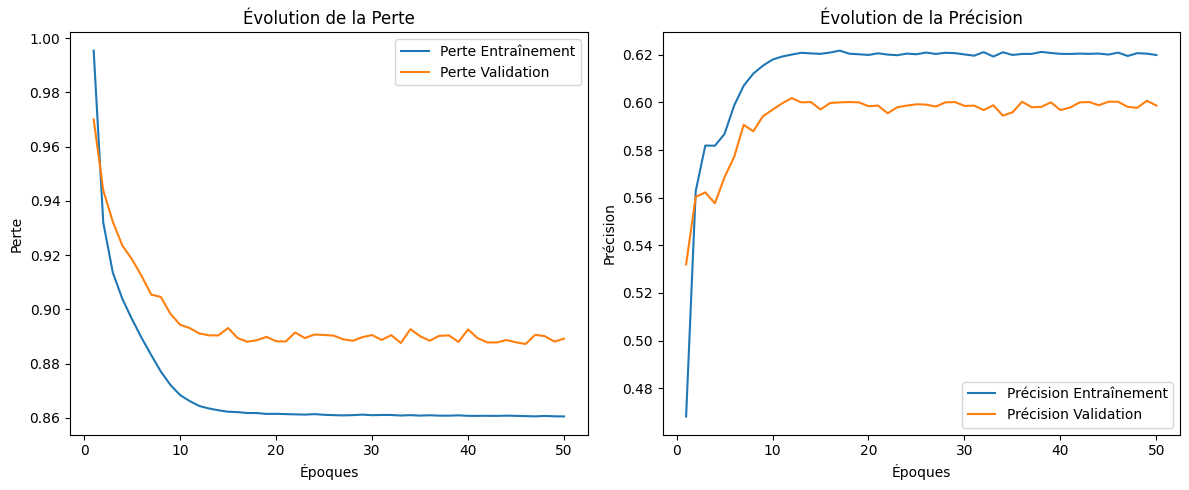

In [ ]:

model = Sequential([
    Dense(1, input_dim=462, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

epochs = range(1, 51)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Perte Entraînement')
plt.plot(epochs, val_loss, label='Perte Validation')
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()
plt.title("Évolution de la Perte")


plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Précision Entraînement')
plt.plot(epochs, val_accuracy, label='Précision Validation')
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()
plt.title("Évolution de la Précision")

plt.tight_layout()
plt.show()

        - Répétez le processus ci-dessus en utilisant 2 et 4 nœuds dans la couche cachée. Utilisez le même type de graphique pour documenter vos observations concernant la perte et la précision.

**reponses**

**Réseau avec 2 nœuds**

Perte :

La perte d'entraînement diminue progressivement et se stabilise à une valeur basse, montrant que le modèle apprend des données d'entraînement.
La perte de validation oscille légèrement autour d'une valeur sans réduction significative après les premières époques, ce qui peut indiquer que le modèle ne généralise pas parfaitement.

Précision :

La précision d'entraînement s'améliore et atteint un plateau, suggérant une bonne convergence.
La précision de validation reste inférieure à celle de l'entraînement, avec des fluctuations, indiquant que le modèle sous-apprend encore quelque peu et a des difficultés à bien généraliser.

**Réseau avec 4 nœuds**

Perte :

La perte d'entraînement diminue de façon plus marquée et atteint une valeur plus basse que dans la configuration avec 2 nœuds, ce qui indique une meilleure capacité d'apprentissage.
La perte de validation reste assez stable avec de légères oscillations, mais elle semble un peu plus basse que celle observée avec 2 nœuds, suggérant une amélioration de la généralisation.

Précision :

La précision d'entraînement atteint un niveau légèrement supérieur, montrant que le modèle est mieux équipé pour capturer les motifs dans les données d'entraînement.
La précision de validation est également plus stable, bien qu'elle reste inférieure à celle de l'entraînement, indiquant un léger sous-apprentissage, mais moins prononcé que dans le cas avec 2 nœuds.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5148 - loss: 0.9822 - val_accuracy: 0.6593 - val_loss: 0.8122
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6872 - loss: 0.7668 - val_accuracy: 0.6678 - val_loss: 0.7779
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6867 - loss: 0.7459 - val_accuracy: 0.6686 - val_loss: 0.7724
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6897 - loss: 0.7412 - val_accuracy: 0.6733 - val_loss: 0.7682
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6888 - loss: 0.7364 - val_accuracy: 0.6691 - val_loss: 0.7687
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6913 - loss: 0.7357 - val_accuracy: 0.6724 - val_loss: 0.7671
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6904 - loss: 0.7329 - val_accuracy: 0.6743 - val_loss: 0.7706
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6914 - loss: 0.7326 - 

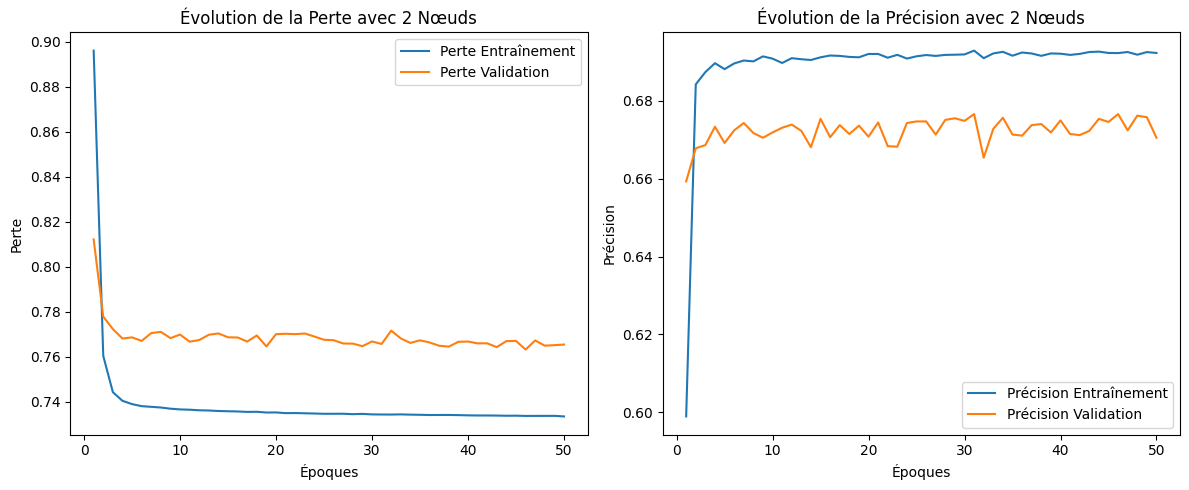

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5630 - loss: 0.9216 - val_accuracy: 0.6602 - val_loss: 0.7757
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6901 - loss: 0.7390 - val_accuracy: 0.6679 - val_loss: 0.7701
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6936 - loss: 0.7360 - val_accuracy: 0.6727 - val_loss: 0.7641
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6929 - loss: 0.7299 - val_accuracy: 0.6741 - val_loss: 0.7612
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6899 - loss: 0.7332 - val_accuracy: 0.6713 - val_loss: 0.7611
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6951 - loss: 0.7225 - val_accuracy: 0.6760 - val_loss: 0.7618
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6955 - loss: 0.7220 - val_accuracy: 0.6736 - val_loss: 0.7643
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6922 - loss: 0.7257 - 

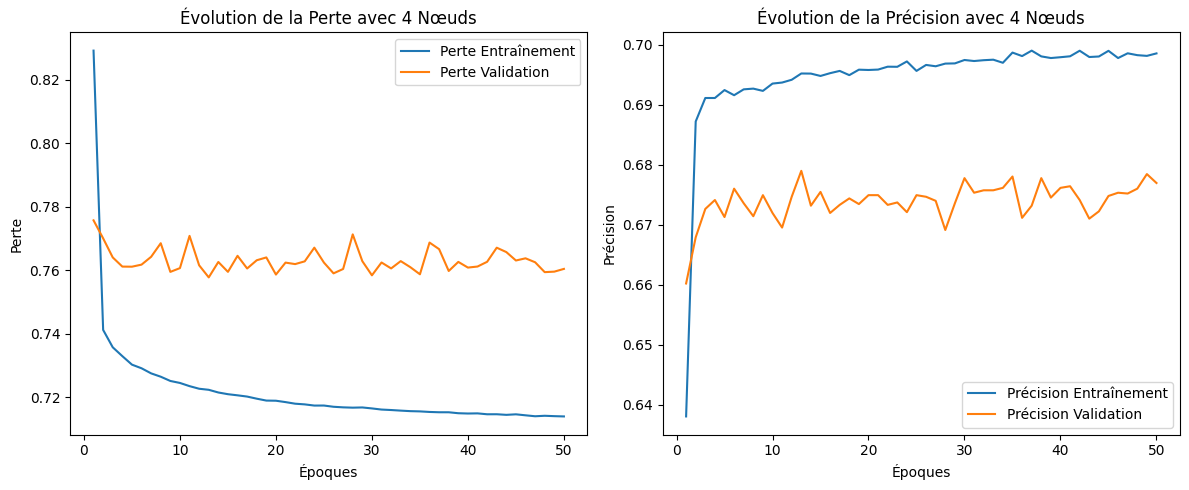

In [ ]:

def train_and_plot(hidden_nodes):
    model = Sequential([
        Dense(hidden_nodes, input_dim=462, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))
    epochs = range(1, 51)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title(f"Évolution de la Perte avec {hidden_nodes} Nœuds")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title(f"Évolution de la Précision avec {hidden_nodes} Nœuds")

    plt.tight_layout()
    plt.show()

train_and_plot(hidden_nodes=2)

train_and_plot(hidden_nodes=4)

        - Commencez avec 8 nœuds dans la couche cachée et doublez progressivement le nombre de nœuds jusqu'à ce qu'il dépasse le nombre de nœuds dans la couche d'entrée. Cela donne lieu à sept expériences et graphiques correspondants pour les configurations suivantes : 8, 16, 32, 64, 128, 256 et 512 nœuds. Documentez vos observations tout au long du processus.

**reponses**

**8 Nœuds**

Perte d'entraînement : Diminue régulièrement, atteignant une valeur stable vers la fin.
Perte de validation : Reste stable avec quelques oscillations, montrant une amélioration modérée de la généralisation par rapport aux modèles plus simples.
Précision : La précision d'entraînement s'améliore, mais la précision de validation est toujours inférieure, indiquant un léger sous-apprentissage.

**16 Nœuds**

Perte d'entraînement : Diminue plus rapidement, montrant une meilleure capacité d'apprentissage.
Perte de validation : Montre une légère augmentation après quelques époques, suggérant que le modèle commence à sur-apprendre légèrement.
Précision : La précision d'entraînement est élevée, mais la précision de validation montre une tendance à stagner, ce qui indique des signes de sur-apprentissage.

**32 Nœuds**

Perte d'entraînement : Continue de diminuer, atteignant des valeurs très basses.
Perte de validation : Montre une tendance à augmenter, ce qui est un indicateur de sur-apprentissage plus marqué.
Précision : La précision d'entraînement augmente rapidement, tandis que la précision de validation diminue, indiquant un sur-apprentissage accru.

**64 Nœuds**

Perte d'entraînement : Diminue très fortement, approchant des valeurs proches de zéro.
Perte de validation : Augmente progressivement, ce qui est un signe clair de sur-apprentissage.
Précision : La précision d'entraînement est presque parfaite, mais la précision de validation continue de diminuer, indiquant une forte inadéquation au jeu de validation.

**128 Nœuds**

Perte d'entraînement : Diminue encore plus, montrant une grande capacité d'apprentissage pour les données d'entraînement.
Perte de validation : Augmente de manière marquée, indiquant un sur-apprentissage très prononcé.
Précision : La précision d'entraînement atteint presque 100 %, tandis que la précision de validation diminue encore, montrant une généralisation très limitée.

**256 Nœuds**
Perte d'entraînement : Pratiquement nulle.
Perte de validation : Continue d'augmenter, indiquant un sur-apprentissage extrême.
Précision : Le modèle atteint une précision quasi parfaite en entraînement, mais la précision de validation est encore plus faible, ce qui montre un manque de généralisation.

**512 Nœuds**

Perte d'entraînement : Toujours proche de zéro.
Perte de validation : Continue d'augmenter de manière très prononcée.
Précision : Le modèle est sur-ajusté aux données d'entraînement avec une précision d'entraînement proche de 100 %, mais la précision de validation reste faible, indiquant une généralisation quasi inexistante.


**en general**,À mesure que le nombre de nœuds augmente, le modèle montre une capacité croissante à apprendre les données d'entraînement, mais cela se fait au détriment de la généralisation. Les modèles avec un grand nombre de nœuds (32, 64, 128, 256, 512) sur-apprennent les données d'entraînement, ce qui entraîne une augmentation de la perte de validation et une diminution de la précision de validation.

La configuration idéale semble être celle avec un nombre de nœuds modéré (8 ou 16 nœuds), où le modèle est en mesure d'apprendre suffisamment bien sans sur-apprendre


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5796 - loss: 0.9072 - val_accuracy: 0.6681 - val_loss: 0.7739
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6874 - loss: 0.7426 - val_accuracy: 0.6601 - val_loss: 0.7816
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6905 - loss: 0.7366 - val_accuracy: 0.6697 - val_loss: 0.7684
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6903 - loss: 0.7333 - val_accuracy: 0.6722 - val_loss: 0.7675
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6940 - loss: 0.7246 - val_accuracy: 0.6716 - val_loss: 0.7657
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6964 - loss: 0.7219 - val_accuracy: 0.6708 - val_loss: 0.7660
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6973 - loss: 0.7198 - val_accuracy: 0.6813 - val_loss: 0.7622
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7030 - loss: 0.7135 - 

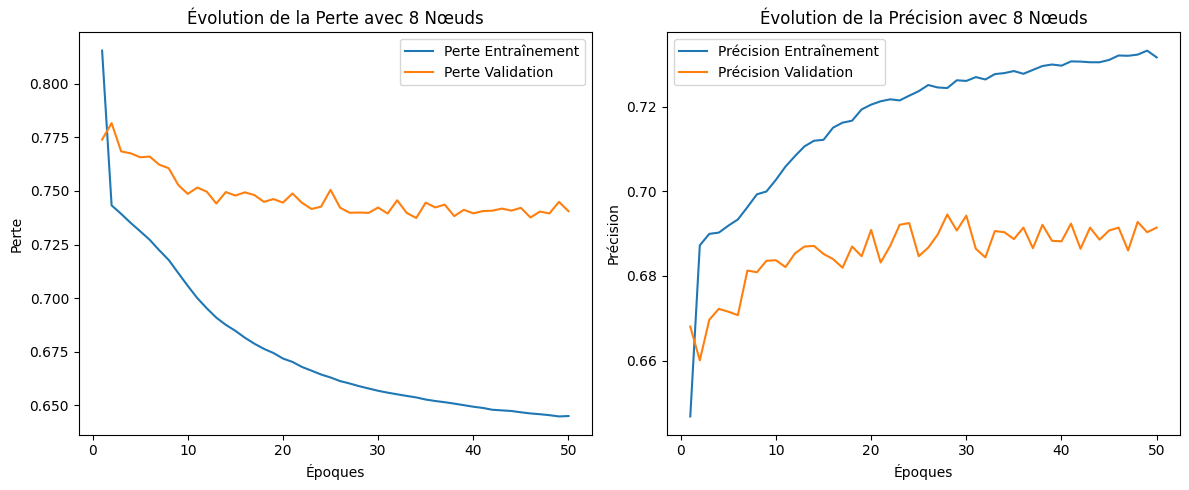

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5913 - loss: 0.8808 - val_accuracy: 0.6648 - val_loss: 0.7697
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6914 - loss: 0.7327 - val_accuracy: 0.6727 - val_loss: 0.7587
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6921 - loss: 0.7205 - val_accuracy: 0.6721 - val_loss: 0.7603
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7022 - loss: 0.7076 - val_accuracy: 0.6839 - val_loss: 0.7478
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7071 - loss: 0.6981 - val_accuracy: 0.6874 - val_loss: 0.7367
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7149 - loss: 0.6826 - val_accuracy: 0.6922 - val_loss: 0.7281
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7237 - loss: 0.6669 - val_accuracy: 0.6947 - val_loss: 0.7216
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7307 - loss: 0.6498 - 

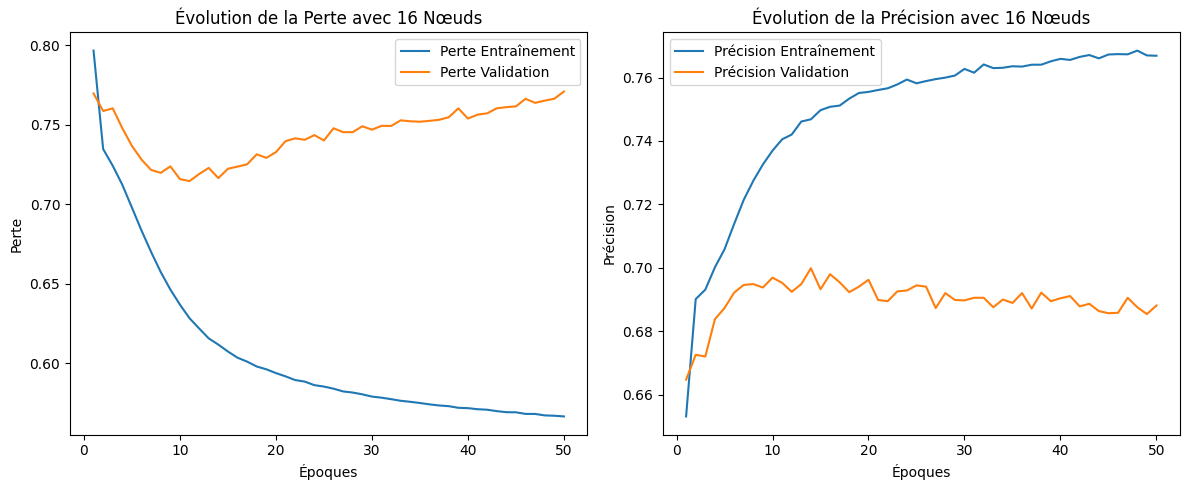

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6199 - loss: 0.8487 - val_accuracy: 0.6702 - val_loss: 0.7682
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6907 - loss: 0.7300 - val_accuracy: 0.6762 - val_loss: 0.7541
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7054 - loss: 0.7029 - val_accuracy: 0.6910 - val_loss: 0.7345
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7231 - loss: 0.6666 - val_accuracy: 0.7006 - val_loss: 0.7143
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7325 - loss: 0.6463 - val_accuracy: 0.7009 - val_loss: 0.7039
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7445 - loss: 0.6239 - val_accuracy: 0.7002 - val_loss: 0.7050
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7528 - loss: 0.6039 - val_accuracy: 0.6979 - val_loss: 0.7072
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7565 - loss: 0.5935 - 

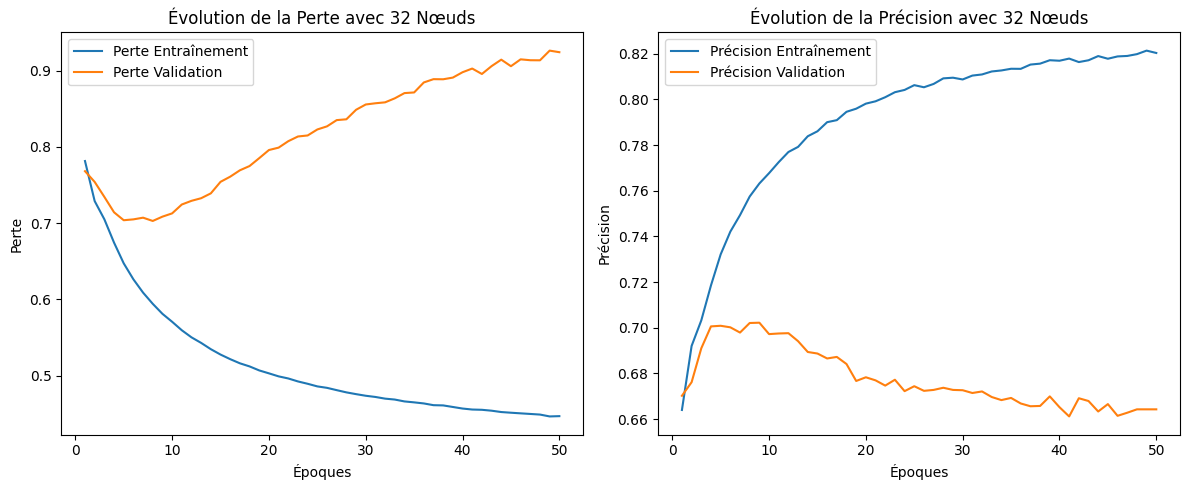

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6218 - loss: 0.8405 - val_accuracy: 0.6727 - val_loss: 0.7634
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6967 - loss: 0.7192 - val_accuracy: 0.6839 - val_loss: 0.7352
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7218 - loss: 0.6751 - val_accuracy: 0.6932 - val_loss: 0.7180
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7416 - loss: 0.6296 - val_accuracy: 0.6995 - val_loss: 0.7121
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7595 - loss: 0.5888 - val_accuracy: 0.7015 - val_loss: 0.7044
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7710 - loss: 0.5642 - val_accuracy: 0.7080 - val_loss: 0.7059
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7841 - loss: 0.5366 - val_accuracy: 0.7044 - val_loss: 0.7169
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7988 - loss: 0.5091 - 

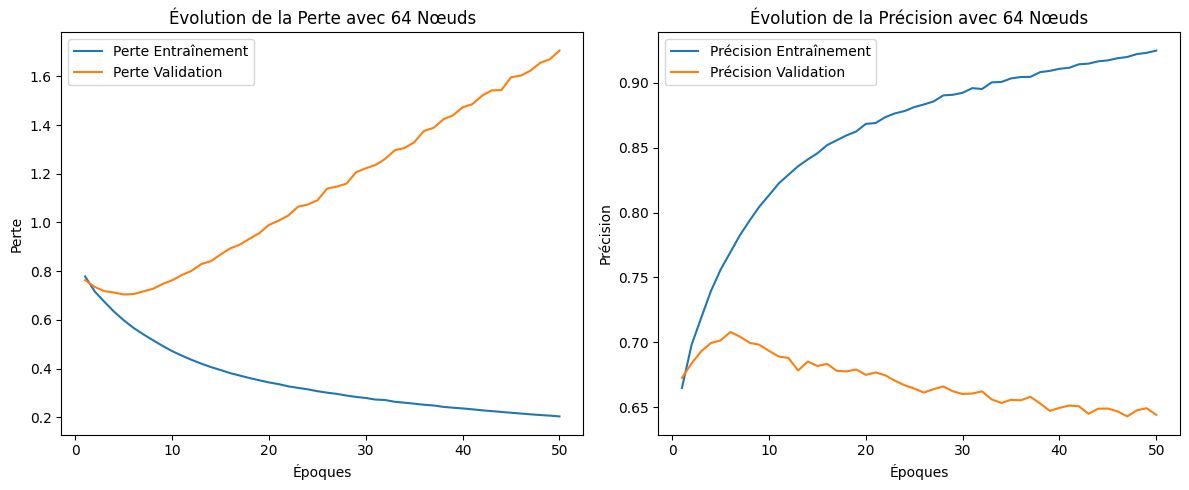

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6375 - loss: 0.8239 - val_accuracy: 0.6727 - val_loss: 0.7601
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7064 - loss: 0.7023 - val_accuracy: 0.6832 - val_loss: 0.7356
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7359 - loss: 0.6410 - val_accuracy: 0.7028 - val_loss: 0.6995
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7623 - loss: 0.5836 - val_accuracy: 0.7033 - val_loss: 0.7071
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7909 - loss: 0.5228 - val_accuracy: 0.7002 - val_loss: 0.7154
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8114 - loss: 0.4770 - val_accuracy: 0.6991 - val_loss: 0.7347
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8377 - loss: 0.4226 - val_accuracy: 0.6903 - val_loss: 0.7710
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8579 - loss: 0.3798 - 

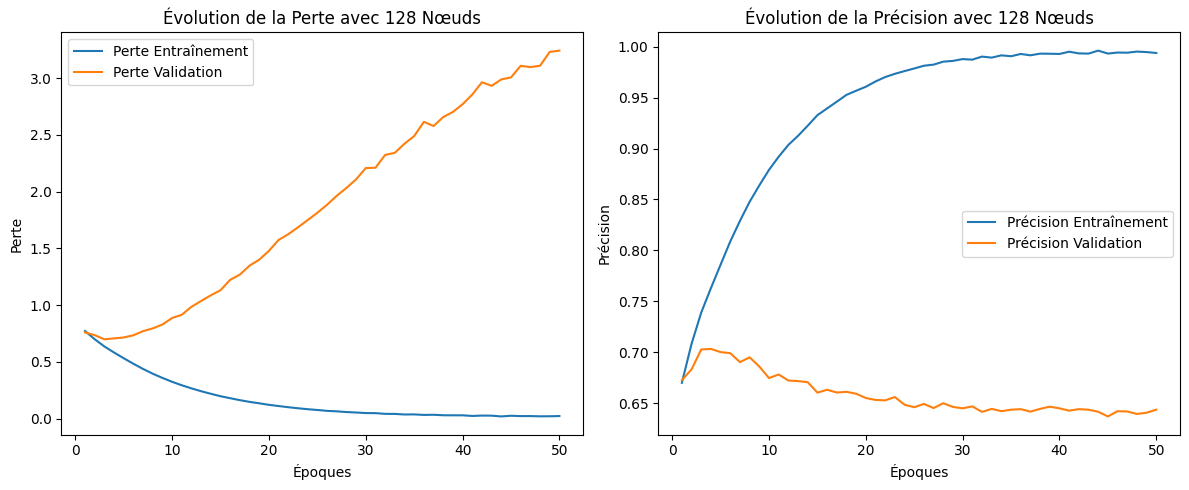

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6458 - loss: 0.8114 - val_accuracy: 0.6817 - val_loss: 0.7452
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7185 - loss: 0.6798 - val_accuracy: 0.7014 - val_loss: 0.7072
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7564 - loss: 0.5986 - val_accuracy: 0.7021 - val_loss: 0.7109
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7961 - loss: 0.5184 - val_accuracy: 0.7057 - val_loss: 0.7107
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8306 - loss: 0.4408 - val_accuracy: 0.7050 - val_loss: 0.7278
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8674 - loss: 0.3636 - val_accuracy: 0.6883 - val_loss: 0.7767
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8941 - loss: 0.2993 - val_accuracy: 0.6875 - val_loss: 0.8375
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9228 - loss: 0.2356 - 

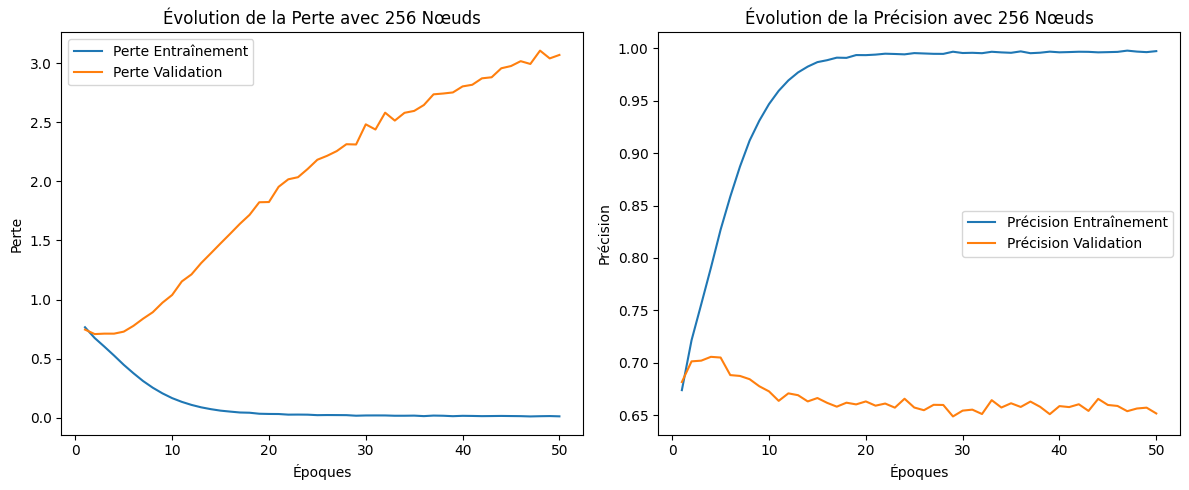

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6467 - loss: 0.8095 - val_accuracy: 0.6855 - val_loss: 0.7367
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7276 - loss: 0.6602 - val_accuracy: 0.7013 - val_loss: 0.7028
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7741 - loss: 0.5587 - val_accuracy: 0.7084 - val_loss: 0.7000
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8305 - loss: 0.4439 - val_accuracy: 0.7029 - val_loss: 0.7299
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3289 - val_accuracy: 0.6964 - val_loss: 0.7845
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9246 - loss: 0.2326 - val_accuracy: 0.6899 - val_loss: 0.8612
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9510 - loss: 0.1623 - val_accuracy: 0.6824 - val_loss: 0.9573
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9693 - loss: 0.1128 - 

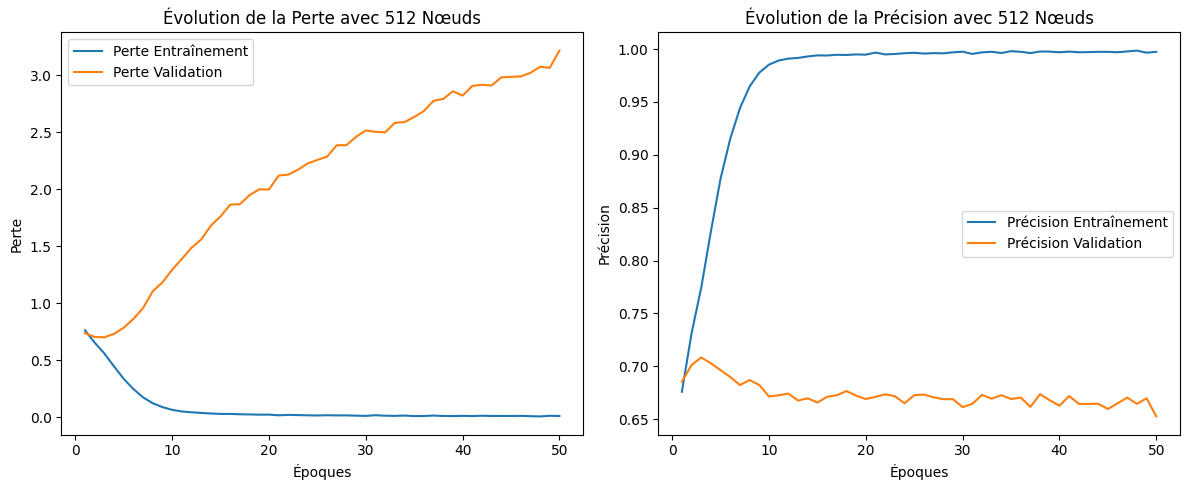

In [ ]:
def train_and_plot(hidden_nodes):
    model = Sequential([
        Dense(hidden_nodes, input_dim=462, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))
    epochs = range(1, 51)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title(f"Évolution de la Perte avec {hidden_nodes} Nœuds")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title(f"Évolution de la Précision avec {hidden_nodes} Nœuds")

    plt.tight_layout()
    plt.show()

for nodes in [8, 16, 32, 64, 128, 256, 512]:
    train_and_plot(hidden_nodes=nodes)

        - Assurez-vous que le **nombre d'époques d'entraînement** est suffisant pour **observer une augmentation de la perte de validation**. **Conseil** : Lors du développement du modèle, commencez avec un petit nombre d'époques, comme 5 ou 10. Une fois que le modèle semble bien fonctionner, testez avec des valeurs plus importantes, comme 40 ou 80 époques, ce qui s'est avéré raisonnable dans nos tests. En fonction de vos observations, envisagez de mener des expériences supplémentaires, si nécessaire. Combien d'époques ont finalement été nécessaires ?

**reponses**

**10 Époques**

* Perte d'entraînement : Diminue régulièrement, indiquant que le modèle apprend bien.
* Perte de validation : Reste relativement stable avec une légère augmentation, ce qui peut indiquer un début de sur-apprentissage.
* Précision de validation : S'améliore légèrement mais reste inférieure à celle de l'entraînement.

**20 Époques**

* Perte d'entraînement : Continue de diminuer et montre une convergence plus claire.
* Perte de validation : Augmente progressivement après quelques époques, suggérant que le modèle commence à sur-apprendre.
* Précision de validation : Ne s'améliore plus significativement et commence à osciller, indiquant un léger sur-apprentissage.

**40 Époques**

* Perte d'entraînement : Diminue fortement, atteignant des valeurs très basses.
* Perte de validation : Montre une augmentation continue, signe de sur-apprentissage plus marqué.
* Précision de validation : Diminue progressivement, indiquant que le modèle perd sa capacité à généraliser.

**80 Époques**

* Perte d'entraînement : Presque nulle, montrant un fort ajustement aux données d'entraînement.
* Perte de validation : Augmente fortement, indiquant un sur-apprentissage prononcé.
* Précision de validation : Continue de diminuer, ce qui confirme une perte de généralisation importante.

**observations**

**En observant ces résultats, il semble que 20 à 30 époques soient un bon compromis pour ce modèle, car le sur-apprentissage devient évident après 20 époques. Un entraînement avec un nombre d’époques modéré (environ 20-30) permettrait d'obtenir des performances optimales sans entraîner une trop forte dégradation de la validation.**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6169 - loss: 0.8528 - val_accuracy: 0.6743 - val_loss: 0.7670
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6959 - loss: 0.7251 - val_accuracy: 0.6685 - val_loss: 0.7639
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7043 - loss: 0.7059 - val_accuracy: 0.6849 - val_loss: 0.7361
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7175 - loss: 0.6747 - val_accuracy: 0.6890 - val_loss: 0.7245
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7325 - loss: 0.6499 - val_accuracy: 0.6976 - val_loss: 0.7122
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7434 - loss: 0.6207 - val_accuracy: 0.6965 - val_loss: 0.7183
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7512 - loss: 0.6026 - val_accuracy: 0.6967 - val_loss: 0.7086
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7655 - loss: 0.5817 - 

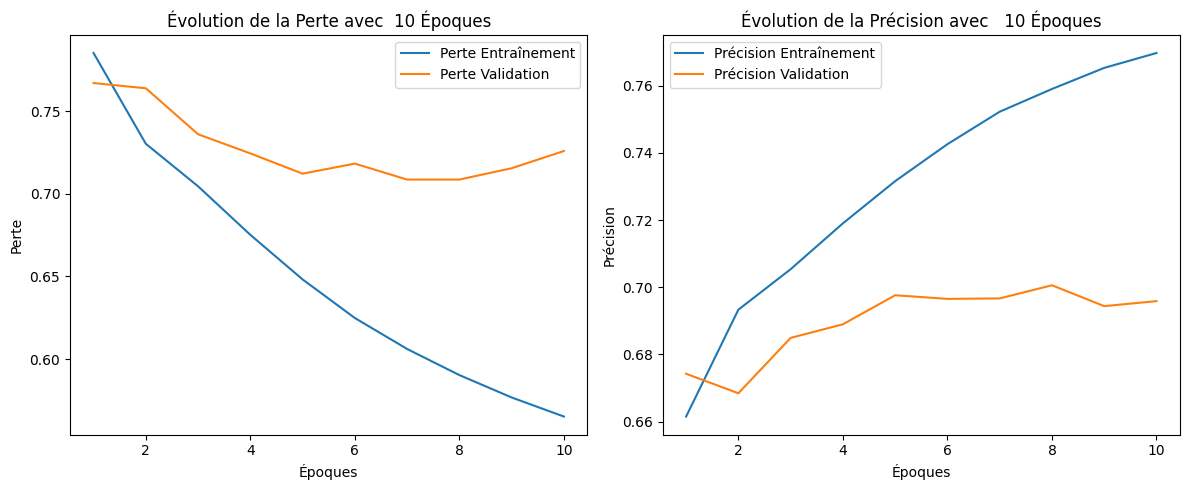

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6143 - loss: 0.8515 - val_accuracy: 0.6736 - val_loss: 0.7628
Epoch 2/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6938 - loss: 0.7249 - val_accuracy: 0.6813 - val_loss: 0.7532
Epoch 3/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7037 - loss: 0.7028 - val_accuracy: 0.6880 - val_loss: 0.7387
Epoch 4/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7184 - loss: 0.6765 - val_accuracy: 0.6991 - val_loss: 0.7222
Epoch 5/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7303 - loss: 0.6512 - val_accuracy: 0.7032 - val_loss: 0.7124
Epoch 6/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7408 - loss: 0.6309 - val_accuracy: 0.7011 - val_loss: 0.7111
Epoch 7/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7508 - loss: 0.6091 - val_accuracy: 0.7022 - val_loss: 0.7049
Epoch 8/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7582 - loss: 0.5905 - 

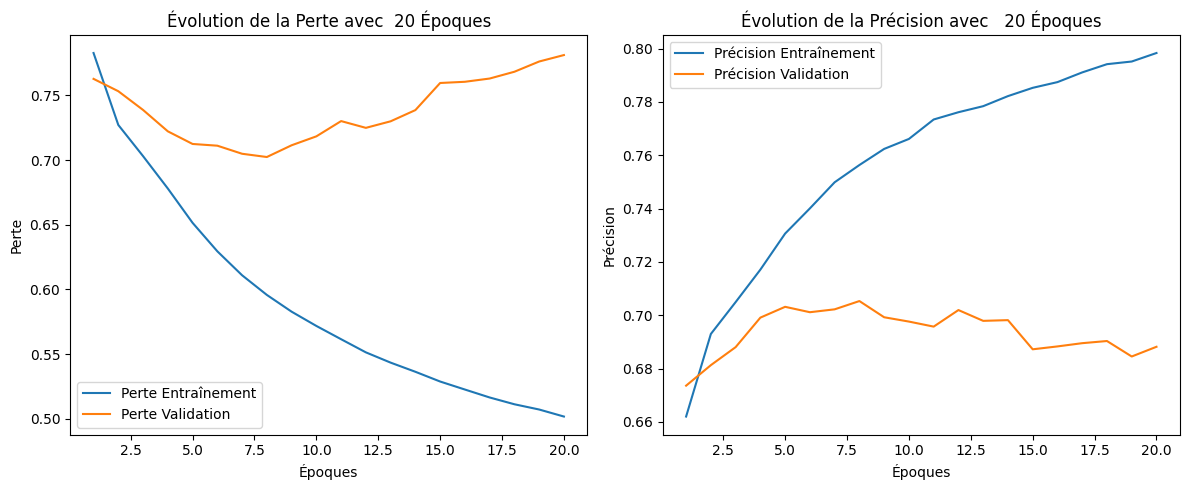

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6194 - loss: 0.8492 - val_accuracy: 0.6710 - val_loss: 0.7702
Epoch 2/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6899 - loss: 0.7314 - val_accuracy: 0.6830 - val_loss: 0.7547
Epoch 3/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6996 - loss: 0.7109 - val_accuracy: 0.6785 - val_loss: 0.7491
Epoch 4/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7123 - loss: 0.6889 - val_accuracy: 0.6871 - val_loss: 0.7294
Epoch 5/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7259 - loss: 0.6595 - val_accuracy: 0.6955 - val_loss: 0.7169
Epoch 6/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7417 - loss: 0.6281 - val_accuracy: 0.6876 - val_loss: 0.7272
Epoch 7/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7547 - loss: 0.6016 - val_accuracy: 0.7036 - val_loss: 0.7087
Epoch 8/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7584 - loss: 0.5868 - 

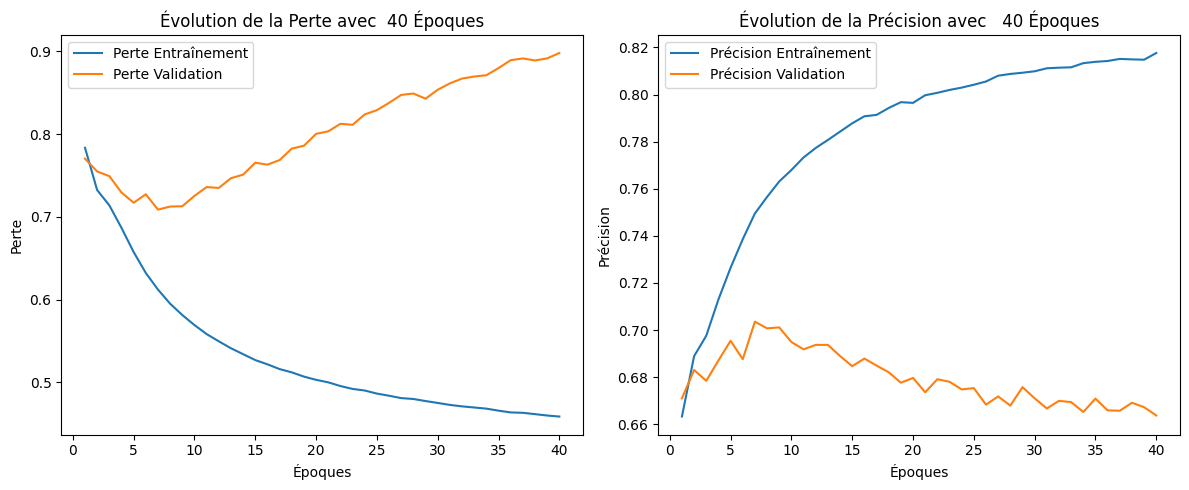

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6233 - loss: 0.8437 - val_accuracy: 0.6724 - val_loss: 0.7691
Epoch 2/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6929 - loss: 0.7258 - val_accuracy: 0.6814 - val_loss: 0.7470
Epoch 3/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7082 - loss: 0.6992 - val_accuracy: 0.6891 - val_loss: 0.7308
Epoch 4/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7247 - loss: 0.6674 - val_accuracy: 0.6963 - val_loss: 0.7148
Epoch 5/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7331 - loss: 0.6422 - val_accuracy: 0.7021 - val_loss: 0.7046
Epoch 6/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7462 - loss: 0.6236 - val_accuracy: 0.7029 - val_loss: 0.7047
Epoch 7/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7540 - loss: 0.6051 - val_accuracy: 0.7025 - val_loss: 0.7058
Epoch 8/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7632 - loss: 0.5853 - 

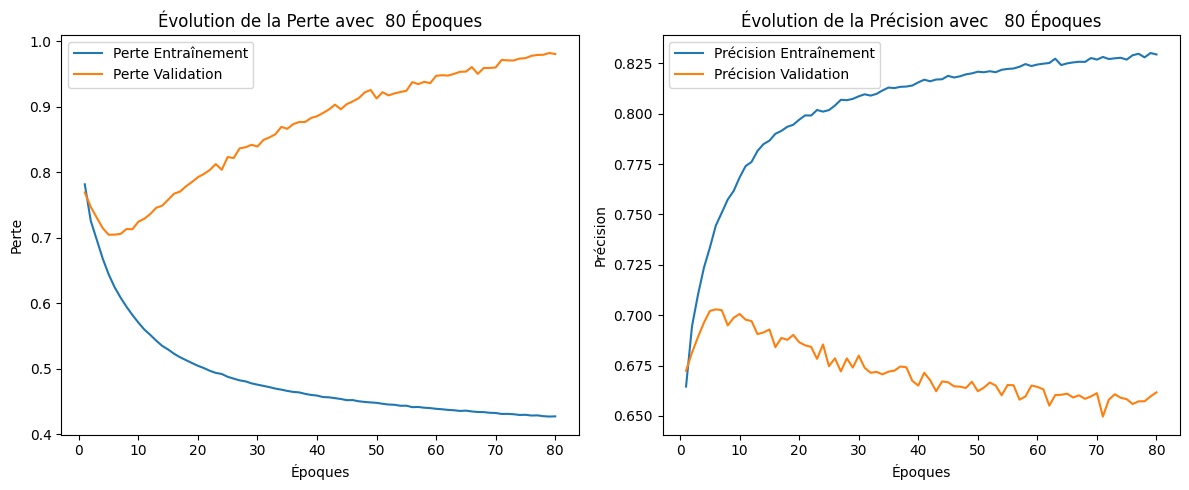

In [ ]:

def train_and_plot(hidden_nodes, num_epochs):
    model = Sequential([
        Dense(hidden_nodes, input_dim=462, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, y_valid))


    epochs = range(1, num_epochs + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title(f"Évolution de la Perte avec  {num_epochs} Époques")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title(f"Évolution de la Précision avec   {num_epochs} Époques")

    plt.tight_layout()
    plt.show()


for num_epochs in [10, 20, 40, 80]:
    train_and_plot(hidden_nodes=32, num_epochs=num_epochs)


    - **Variation du nombre de couches**.

        - Réalisez des expériences similaires à celles décrites ci-dessus, mais cette fois en faisant varier le nombre de couches de 1 à 4. Documentez vos résultats.

**reponses**

**Modèle avec 1 couche**


*   Perte d'entraînement : Diminue rapidement et atteint des valeurs faibles, ce qui indique un bon apprentissage sur l’ensemble d'entraînement.
*  Perte de validation : Augmente progressivement, montrant des signes de sur-apprentissage au fur et à mesure des époques.


* Précision de validation : Diminue légèrement après un certain nombre d'époques, ce qui confirme un manque de généralisation et le début d’un sur-apprentissage.

**Modèle avec 2 couches**

* Perte d'entraînement : Diminue de façon significative, atteignant des valeurs très faibles.
* Perte de validation : Augmente davantage, avec des signes de sur-apprentissage plus prononcés que dans le modèle avec 1 couche cachée.
* Précision de validation : Diminue plus rapidement, ce qui indique que le modèle est encore plus ajusté aux données d’entraînement mais perd en généralisation.

**Modèle avec 3 couches**

* Perte d'entraînement : Continue de diminuer jusqu’à presque zéro, illustrant un ajustement très fort aux données d'entraînement.
* Perte de validation : Augmente de manière plus marquée et oscille fortement, indiquant un sur-apprentissage encore plus important.
* Précision de validation : La précision de validation diminue, montrant une dégradation de la performance sur l'ensemble de validation, ce qui confirme le sur-apprentissage accru avec l'ajout de couches.

**Modèle avec 4 couches**

* Perte d'entraînement : Atteint presque zéro, indiquant une parfaite adaptation aux données d'entraînement.
* Perte de validation : Augmente significativement et devient très élevée, ce qui est un signe de sur-apprentissage extrême.
* Précision de validation : Diminue de manière marquée, ce qui confirme une mauvaise généralisation aux données de validation.


**À mesure que le nombre de couches cachées augmente, le modèle devient de plus en plus complexe et finit par sur-apprendre fortement aux données d’entraînement. Le modèle avec 1 couche cachée semble offrir un bon compromis, car il est capable de capturer des motifs sans sur-apprendre de manière excessive. Les modèles avec 3 ou 4 couches cachées montrent un sur-apprentissage extrême, avec une forte perte de généralisation.**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6218 - loss: 0.8455 - val_accuracy: 0.6710 - val_loss: 0.7701
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6893 - loss: 0.7358 - val_accuracy: 0.6794 - val_loss: 0.7578
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6987 - loss: 0.7134 - val_accuracy: 0.6851 - val_loss: 0.7465
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7150 - loss: 0.6906 - val_accuracy: 0.6898 - val_loss: 0.7302
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7223 - loss: 0.6681 - val_accuracy: 0.6949 - val_loss: 0.7221
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7354 - loss: 0.6422 - val_accuracy: 0.7002 - val_loss: 0.7111
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7461 - loss: 0.6235 - val_accuracy: 0.6972 - val_loss: 0.7093
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7576 - loss: 0.6003 - 

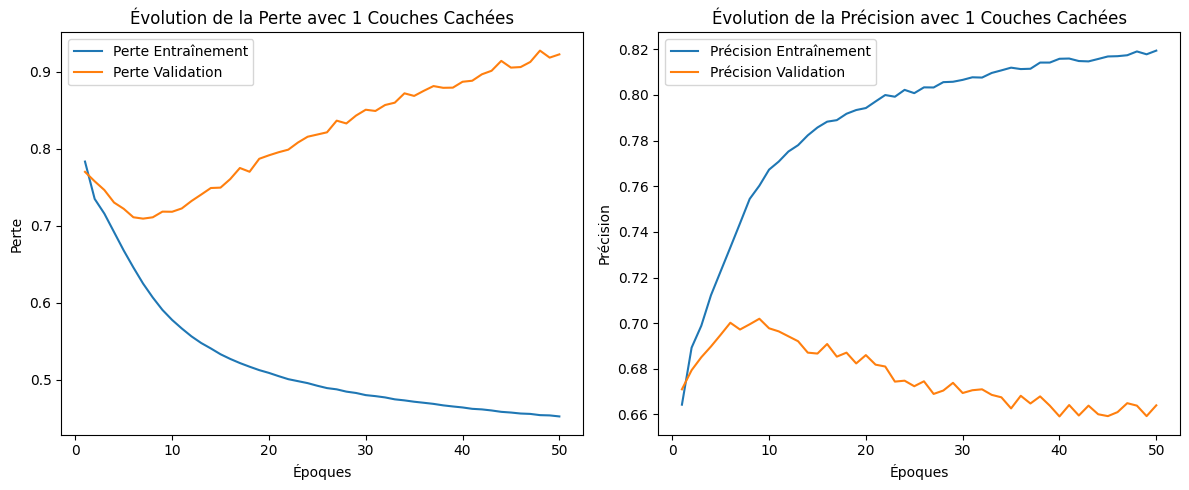

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6031 - loss: 0.8581 - val_accuracy: 0.6598 - val_loss: 0.7824
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6902 - loss: 0.7284 - val_accuracy: 0.6724 - val_loss: 0.7645
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7075 - loss: 0.6952 - val_accuracy: 0.6870 - val_loss: 0.7463
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7284 - loss: 0.6509 - val_accuracy: 0.6955 - val_loss: 0.7200
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7417 - loss: 0.6244 - val_accuracy: 0.6952 - val_loss: 0.7225
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7519 - loss: 0.6012 - val_accuracy: 0.6963 - val_loss: 0.7165
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7661 - loss: 0.5745 - val_accuracy: 0.6980 - val_loss: 0.7259
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7701 - loss: 0.5633 - 

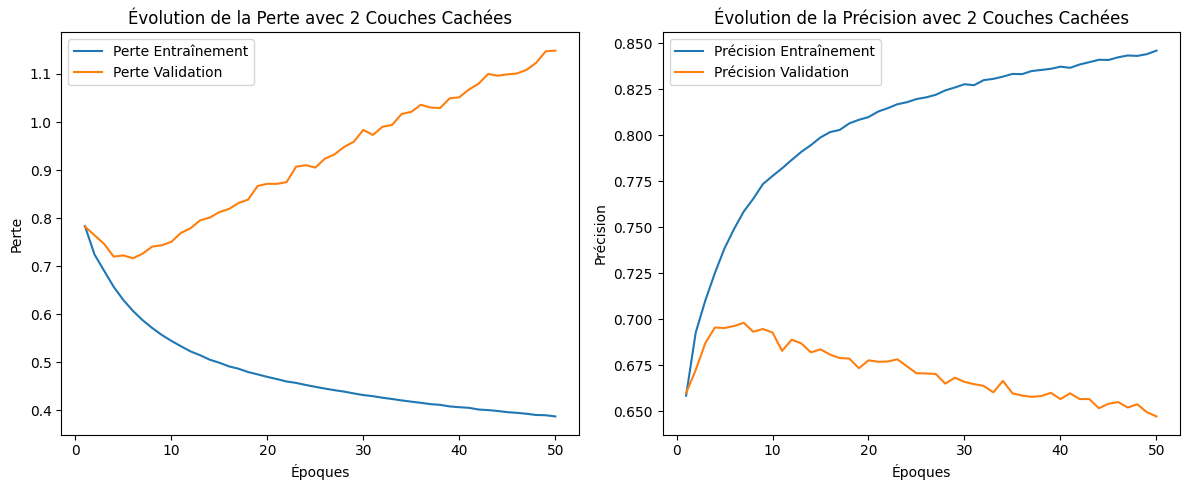

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6196 - loss: 0.8424 - val_accuracy: 0.6735 - val_loss: 0.7633
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7012 - loss: 0.7127 - val_accuracy: 0.6886 - val_loss: 0.7389
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7164 - loss: 0.6747 - val_accuracy: 0.6938 - val_loss: 0.7241
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7408 - loss: 0.6291 - val_accuracy: 0.6960 - val_loss: 0.7143
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7507 - loss: 0.6020 - val_accuracy: 0.6897 - val_loss: 0.7200
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7632 - loss: 0.5786 - val_accuracy: 0.6979 - val_loss: 0.7277
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7680 - loss: 0.5603 - val_accuracy: 0.6992 - val_loss: 0.7342
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7798 - loss: 0.5407 - 

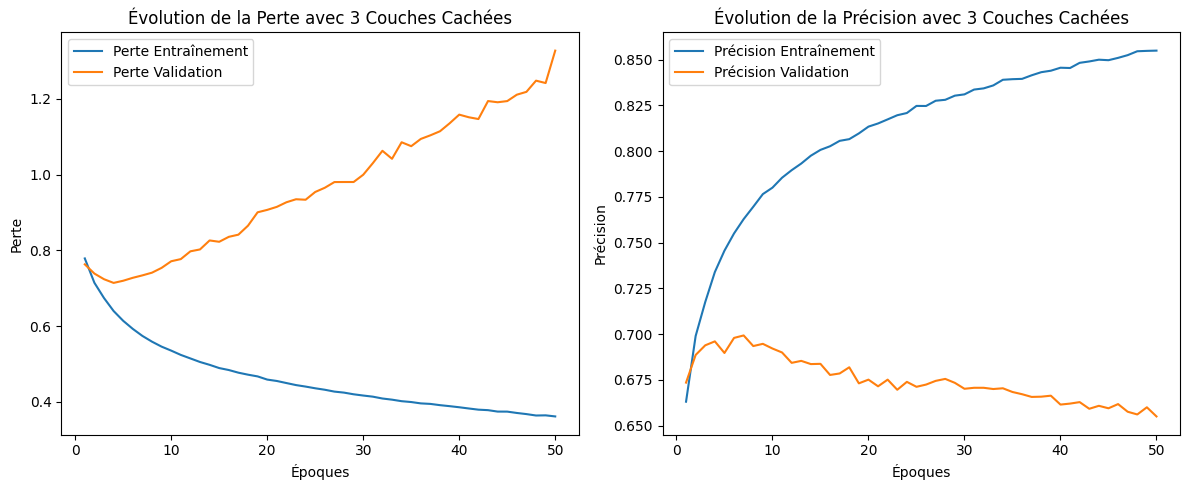

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6051 - loss: 0.8486 - val_accuracy: 0.6766 - val_loss: 0.7604
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6949 - loss: 0.7220 - val_accuracy: 0.6911 - val_loss: 0.7348
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7198 - loss: 0.6705 - val_accuracy: 0.6967 - val_loss: 0.7147
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7374 - loss: 0.6316 - val_accuracy: 0.6968 - val_loss: 0.7120
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7501 - loss: 0.6050 - val_accuracy: 0.6893 - val_loss: 0.7345
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7575 - loss: 0.5861 - val_accuracy: 0.7013 - val_loss: 0.7256
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7697 - loss: 0.5650 - val_accuracy: 0.6929 - val_loss: 0.7498
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7747 - loss: 0.5498 - 

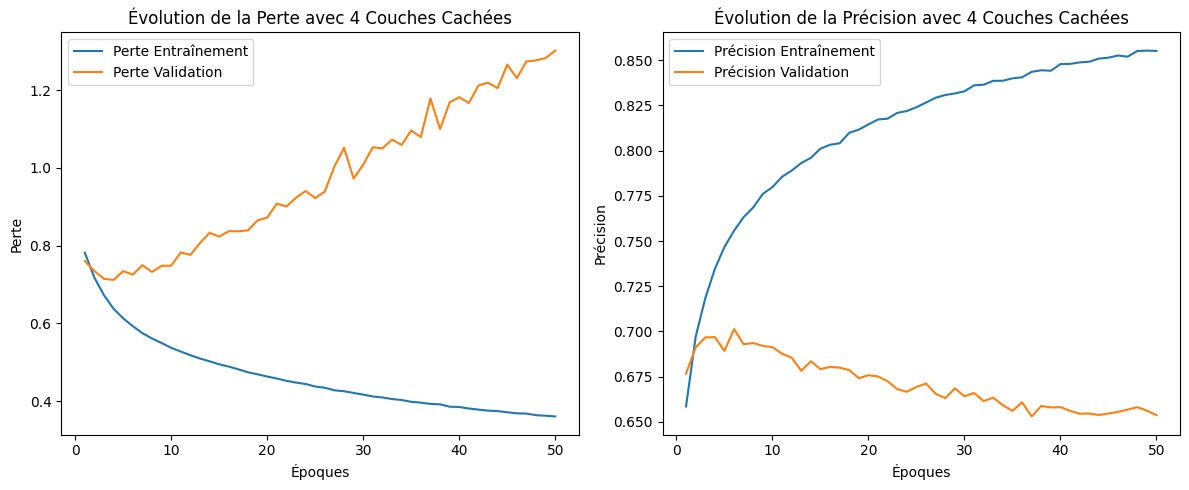

In [ ]:
def train_and_plot(num_hidden_layers, num_nodes=32, num_epochs=50):
    model = Sequential()


    for _ in range(num_hidden_layers):
        model.add(Dense(num_nodes, activation='relu', input_dim=462))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, y_valid))

    epochs = range(1, num_epochs + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title(f"Évolution de la Perte avec {num_hidden_layers} Couches Cachées")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title(f"Évolution de la Précision avec {num_hidden_layers} Couches Cachées")

    plt.tight_layout()
    plt.show()


for num_layers in [1, 2, 3, 4]:
    train_and_plot(num_hidden_layers=num_layers)

        - Combien de nœuds chaque couche devrait-elle contenir ? Testez au moins deux scénarios. Traditionnellement, une stratégie courante consistait à diminuer le nombre de nœuds de la couche d'entrée à la couche de sortie, souvent en divisant par deux, pour créer une structure en pyramide. Cependant, l'expérience récente suggère que le maintien d'un nombre constant de nœuds dans toutes les couches peut également bien fonctionner. Décrivez vos observations. Il est acceptable que les deux stratégies produisent des résultats similaires en termes de performance.

**reponses**

**Structure en pyramide : [128, 64, 32, 16]**

* Perte d'entraînement : La perte diminue rapidement et atteint presque zéro, montrant que le modèle apprend très bien sur les données d'entraînement.
* Perte de validation : Augmente de manière significative au fil des époques, ce qui est un signe clair de sur-apprentissage. Le modèle est trop complexe et ne généralise pas bien aux données de validation.
* Précision de validation : La précision de validation diminue progressivement après quelques époques, montrant que le modèle perd sa capacité de généralisation au fur et à mesure qu'il sur-apprend les données d'entraînement.

**Nombre constant de nœuds : [64, 64, 64, 64]**
* Perte d'entraînement : Diminue également de manière importante, atteignant des valeurs très basses, ce qui montre que le modèle s'ajuste bien aux données d'entraînement.
* Perte de validation : Augmente progressivement, mais reste légèrement plus stable que dans la structure en pyramide. Cela indique un sur-apprentissage, mais un peu moins prononcé que dans le cas pyramidal.
* Précision de validation : La précision de validation diminue également après quelques époques, montrant un sur-apprentissage, mais les oscillations sont un peu moins prononcées, ce qui suggère une meilleure régularisation par rapport à la structure en pyramide.

**Les deux configurations montrent des signes de sur-apprentissage, mais la structure avec un nombre constant de nœuds (64 pour chaque couche) semble légèrement mieux adaptée, car elle présente un sur-apprentissage moins prononcé que la structure en pyramide.**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6299 - loss: 0.8291 - val_accuracy: 0.6844 - val_loss: 0.7456
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7143 - loss: 0.6826 - val_accuracy: 0.6909 - val_loss: 0.7242
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7543 - loss: 0.5925 - val_accuracy: 0.6940 - val_loss: 0.7288
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7869 - loss: 0.5276 - val_accuracy: 0.6905 - val_loss: 0.7524
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8214 - loss: 0.4535 - val_accuracy: 0.6857 - val_loss: 0.8110
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8466 - loss: 0.3983 - val_accuracy: 0.6789 - val_loss: 0.8788
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8707 - loss: 0.3417 - val_accuracy: 0.6775 - val_loss: 0.9122
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8867 - loss: 0.3050 -

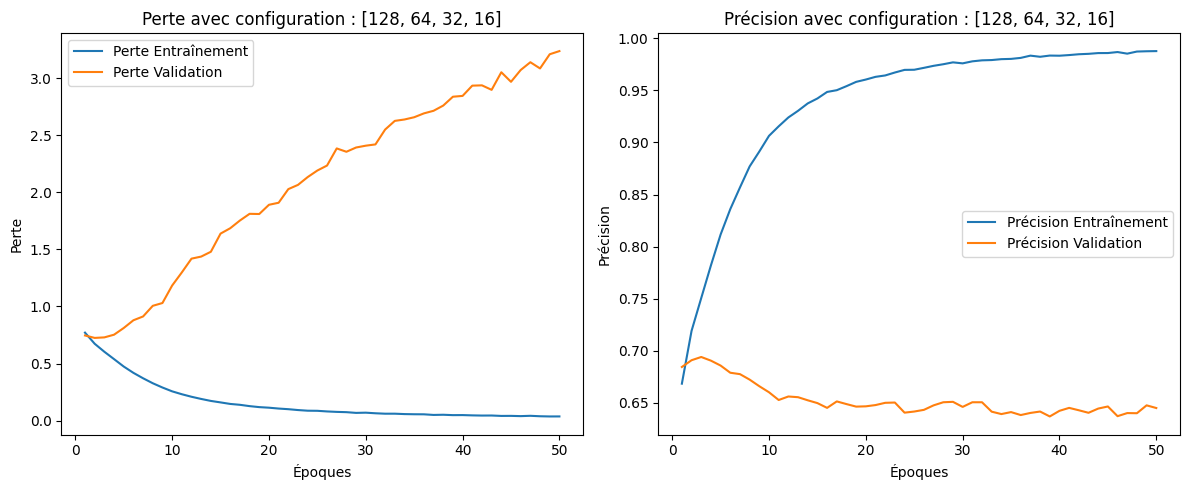

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6188 - loss: 0.8358 - val_accuracy: 0.6502 - val_loss: 0.7989
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7043 - loss: 0.7031 - val_accuracy: 0.6961 - val_loss: 0.7229
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7361 - loss: 0.6310 - val_accuracy: 0.6983 - val_loss: 0.7276
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7624 - loss: 0.5776 - val_accuracy: 0.7010 - val_loss: 0.7253
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7822 - loss: 0.5252 - val_accuracy: 0.6895 - val_loss: 0.7649
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7971 - loss: 0.4975 - val_accuracy: 0.6964 - val_loss: 0.7676
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8134 - loss: 0.4624 - val_accuracy: 0.6825 - val_loss: 0.8137
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8266 - loss: 0.4322 - 

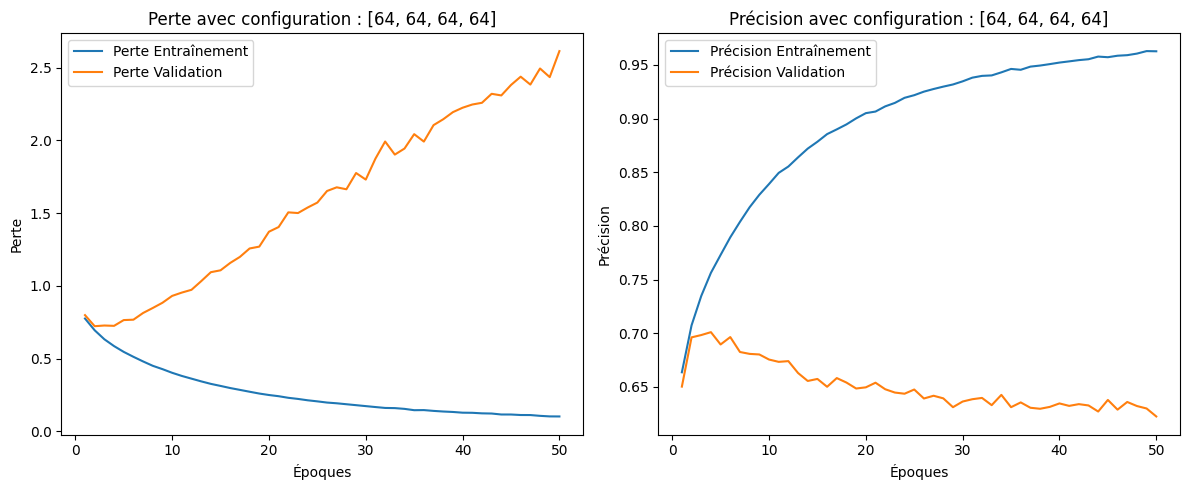

In [ ]:
def train_and_plot(layers_config, num_epochs=50):
    model = Sequential()
    for nodes in layers_config:
        model.add(Dense(nodes, activation='relu', input_dim=462))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, y_valid))
    epochs = range(1, num_epochs + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title(f"Perte avec configuration : {layers_config}")
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title(f"Précision avec configuration : {layers_config}")

    plt.tight_layout()
    plt.show()

# Scénario 1 : Structure en pyramide (128, 64, 32, 16)
train_and_plot([128, 64, 32, 16])

# Scénario 2 : Nombre constant de nœuds (64, 64, 64, 64)
train_and_plot([64, 64, 64, 64])

        - Sélectionnez un de vos modèles qui illustre le surapprentissage. Dans nos expériences, nous avons facilement construit un modèle atteignant près de 100 % de précision sur les données d'entraînement, sans aucune amélioration similaire sur l'ensemble de validation. Présentez ce réseau de neurones avec ses graphiques de précision et de perte. Expliquez pourquoi vous concluez que le modèle surapprend.

**reponses**

**Perte d'entraînement vs Perte de validation :**

* La perte d'entraînement diminue très rapidement et atteint des valeurs proches de zéro, ce qui signifie que le modèle s'adapte parfaitement aux données d'entraînement.

* En revanche, la perte de validation augmente de façon marquée après quelques époques et atteint même des valeurs élevées. Cette divergence entre la perte d'entraînement (qui reste basse) et la perte de validation (qui augmente) est un signe clair que le modèle surapprend. Cela signifie que le modèle devient moins performant sur les données de validation à mesure qu'il s'ajuste de plus en plus aux données d'entraînement.

**Précision d'entraînement vs Précision de validation :**

* La précision d'entraînement augmente rapidement pour atteindre presque 100 %, indiquant que le modèle a mémorisé les données d'entraînement et atteint une performance quasi parfaite sur celles-ci.

* La précision de validation, cependant, reste stable autour de 65 % à 70 % et montre même de légères oscillations. Cela indique que le modèle ne parvient pas à généraliser aux données de validation. La grande différence entre la précision d'entraînement et celle de validation est une caractéristique évidente de surapprentissage.




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6312 - loss: 0.8261 - val_accuracy: 0.6829 - val_loss: 0.7511
Epoch 2/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7193 - loss: 0.6714 - val_accuracy: 0.7013 - val_loss: 0.7081
Epoch 3/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7595 - loss: 0.5801 - val_accuracy: 0.6963 - val_loss: 0.7185
Epoch 4/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7944 - loss: 0.5070 - val_accuracy: 0.6980 - val_loss: 0.7727
Epoch 5/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8307 - loss: 0.4289 - val_accuracy: 0.6874 - val_loss: 0.8312
Epoch 6/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.3628 - val_accuracy: 0.6782 - val_loss: 0.8676
Epoch 7/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8821 - loss: 0.3114 - val_accuracy: 0.6727 - val_loss: 0.9659
Epoch 8/80
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9016 - loss: 0.2616 - 

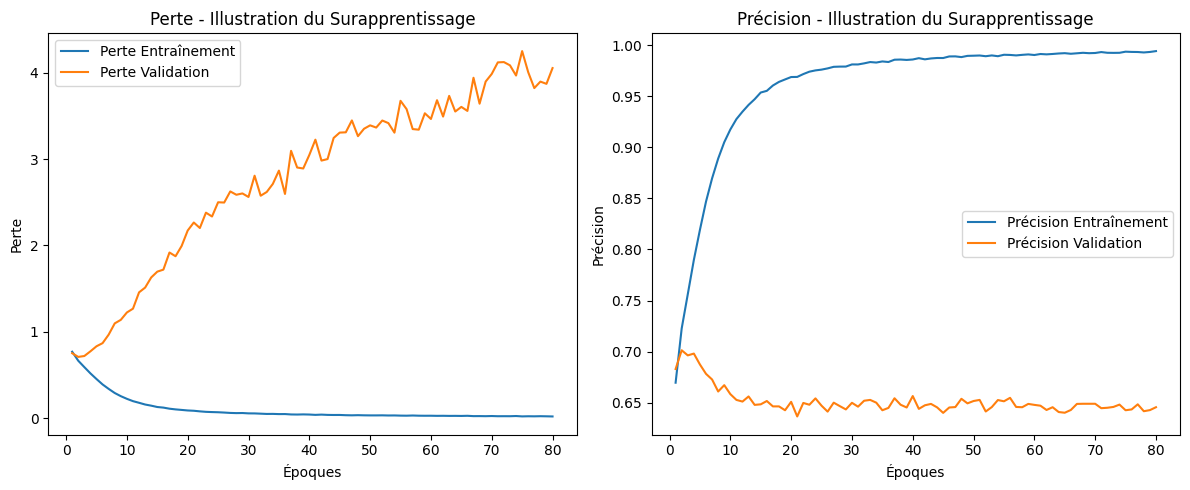

In [ ]:
def train_and_plot_surlearning():

    model = Sequential([
        Dense(128, activation='relu', input_dim=462),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_valid, y_valid))
    epochs = range(1, 81)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title("Perte - Illustration du Surapprentissage")


    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title("Précision - Illustration du Surapprentissage")

    plt.tight_layout()
    plt.show()

train_and_plot_surlearning()

    - **Fonction d'activation**.

        - Présentez les résultats pour une des configurations mentionnées ci-dessus en variant la fonction d'activation. Testez au moins `relu` (le paramètre par défaut) et `sigmoid`. Le choix du modèle spécifique, y compris le nombre de couches et de nœuds, est à votre discrétion. Documentez vos observations en conséquence.

**reponses**

ReLU : La fonction ReLU permet un apprentissage rapide et une précision d'entraînement élevée. Cependant, elle est plus sujette au surapprentissage dans ce modèle, avec une perte de validation qui augmente fortement et une précision de validation qui diminue.

Sigmoid : L'apprentissage est plus lent avec Sigmoid, et le modèle atteint une précision d'entraînement inférieure. La perte de validation augmente également, mais le surapprentissage est légèrement moins prononcé que pour ReLU. Toutefois, la saturation des gradients rend difficile l'atteinte d'une précision élevée.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6294 - loss: 0.8327 - val_accuracy: 0.6798 - val_loss: 0.7568
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7010 - loss: 0.7084 - val_accuracy: 0.6959 - val_loss: 0.7207
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7302 - loss: 0.6449 - val_accuracy: 0.7006 - val_loss: 0.7059
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7570 - loss: 0.5857 - val_accuracy: 0.6999 - val_loss: 0.7069
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7757 - loss: 0.5437 - val_accuracy: 0.6984 - val_loss: 0.7245
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7922 - loss: 0.5106 - val_accuracy: 0.6938 - val_loss: 0.7539
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8104 - loss: 0.4740 - val_accuracy: 0.6925 - val_loss: 0.7732
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8209 - loss: 0.4476 - 

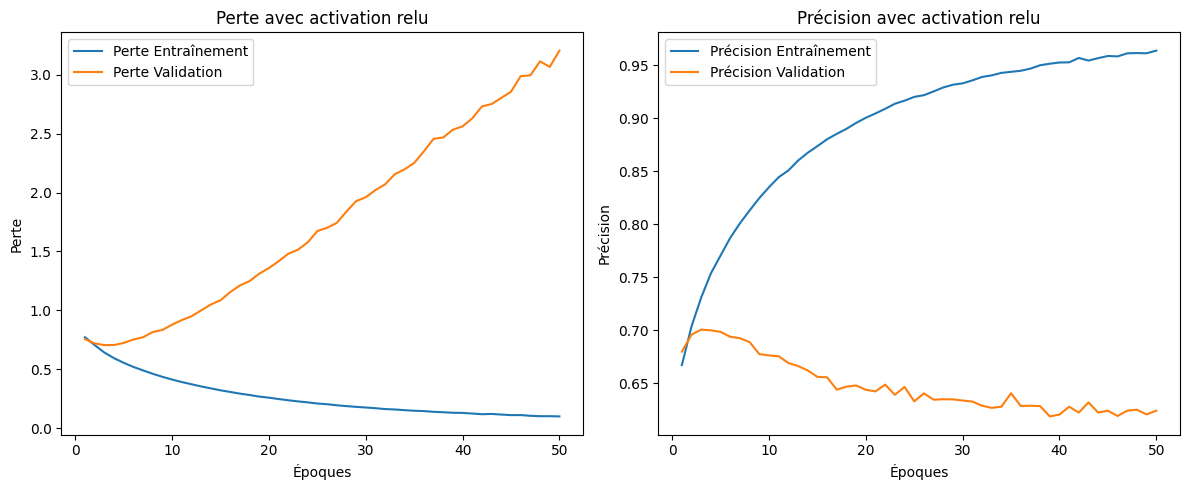

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5612 - loss: 0.9147 - val_accuracy: 0.6772 - val_loss: 0.7626
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6880 - loss: 0.7425 - val_accuracy: 0.6724 - val_loss: 0.7807
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6916 - loss: 0.7328 - val_accuracy: 0.6740 - val_loss: 0.7596
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6909 - loss: 0.7301 - val_accuracy: 0.6749 - val_loss: 0.7691
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6923 - loss: 0.7313 - val_accuracy: 0.6749 - val_loss: 0.7586
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6938 - loss: 0.7310 - val_accuracy: 0.6718 - val_loss: 0.7647
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6931 - loss: 0.7313 - val_accuracy: 0.6752 - val_loss: 0.7642
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6953 - loss: 0.7233 - 

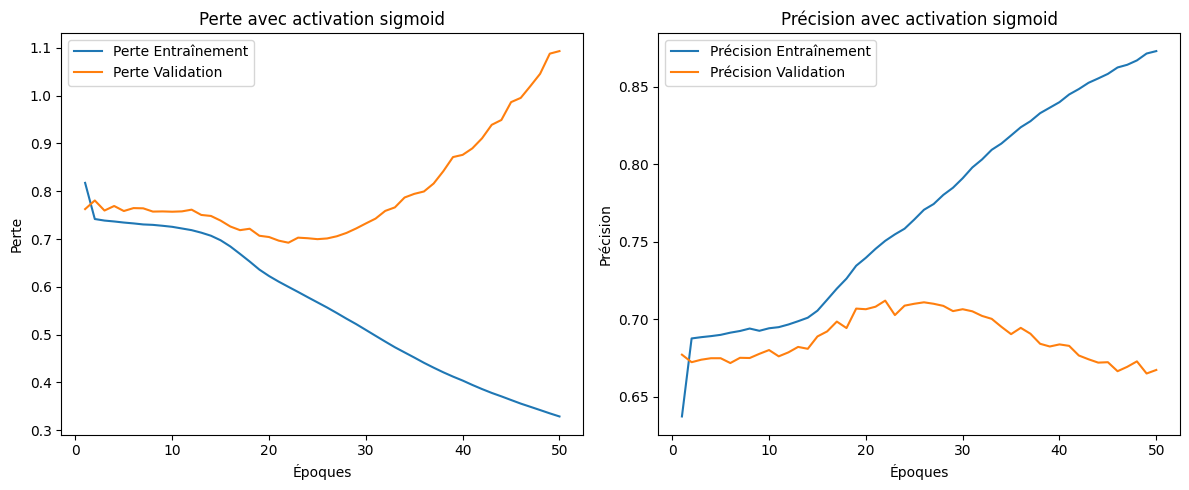

In [ ]:
def train_and_plot_activation(activation_func, num_epochs=50):
    model = Sequential([
        Dense(64, activation=activation_func, input_dim=462),
        Dense(64, activation=activation_func),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, y_valid))

    epochs = range(1, num_epochs + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title(f"Perte avec activation {activation_func}")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title(f"Précision avec activation {activation_func}")

    plt.tight_layout()
    plt.show()

#  visualisation du modèle avec ReLU
train_and_plot_activation('relu')

# visualisation du modèle avec Sigmoid
train_and_plot_activation('sigmoid')

    - **Régularisation** dans les réseaux de neurones est une technique utilisée pour éviter le surapprentissage.

        - Une technique consiste à ajouter une pénalité à la fonction de perte pour décourager les modèles excessivement complexes. Appliquez une pénalité `l2` à certaines ou à toutes les couches. Soyez prudent, car des pénalités trop agressives se sont révélées problématiques dans nos expériences. Commencez avec la valeur par défaut `l2` de 0.01, puis réduisez-la à 0.001 et à 1e-4. Sélectionnez un modèle spécifique parmi les expériences ci-dessus et présentez un cas où vous avez réussi à réduire le surapprentissage. Incluez une paire de graphiques comparant les résultats avec et sans régularisation. Expliquez votre raisonnement pour conclure que le surapprentissage a été réduit. N'espérez pas éliminer complètement le surapprentissage. Encore une fois, il s'agit d'un ensemble de données difficile à travailler.

**reponses**

**Modèle sans régularisation**

* Perte d'entraînement : Diminue rapidement et atteint des valeurs proches de zéro, ce qui indique un apprentissage très efficace sur les données d'entraînement.
* Perte de validation : Augmente considérablement au fil des époques, montrant un surapprentissage significatif.
* Précision de validation : Diminue après quelques époques, confirmant que le modèle manque de généralisation.

**Modèle avec régularisation L2 = 0.01**

* Perte d'entraînement : La perte d'entraînement diminue plus lentement qu'en l'absence de régularisation, mais reste modérée.
* Perte de validation : La perte de validation reste relativement stable après quelques oscillations, montrant une réduction notable du surapprentissage.
* Précision de validation : Bien qu'elle montre des fluctuations, la précision de validation reste plus stable qu'en l'absence de régularisation, indiquant que le modèle généralise mieux. Cependant, la pénalité de 0.01 est un peu agressive, car elle semble réduire la capacité d'apprentissage du modèle.

**Modèle avec régularisation L2 = 0.001**

* Perte d'entraînement : La perte d'entraînement diminue de manière équilibrée, permettant au modèle de conserver une capacité d'apprentissage sans ajustement excessif.
* Perte de validation : Plus stable par rapport au modèle sans régularisation, avec une réduction marquée du surapprentissage. La perte de validation reste à un niveau acceptable.
* Précision de validation : La précision de validation est plus élevée et plus stable que pour les autres configurations, ce qui montre que cette valeur de régularisation est efficace pour limiter le surapprentissage tout en maintenant une bonne généralisation. Cela semble être le meilleur compromis entre apprentissage et généralisation.

**Modèle avec régularisation L2 = 0.0001**
* Perte d'entraînement : La perte d'entraînement diminue presque aussi rapidement que sans régularisation, montrant que la pénalité est faible et n'a pas un impact significatif sur l'apprentissage.
* Perte de validation : La perte de validation augmente toujours, bien qu'un peu moins que sans régularisation, indiquant que cette pénalité est trop faible pour réduire efficacement le surapprentissage.
* Précision de validation : Elle reste basse, similaire aux résultats sans régularisation, indiquant que cette valeur de régularisation est insuffisante pour limiter le surapprentissage.





**la régularisation L2 avec une valeur de 0.001 a permis de réduire efficacement le surapprentissage tout en conservant une bonne généralisation, comme le montre la stabilité accrue de la perte et de la précision de validation.**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6266 - loss: 0.8327 - val_accuracy: 0.6671 - val_loss: 0.7694
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7011 - loss: 0.7071 - val_accuracy: 0.6917 - val_loss: 0.7187
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7356 - loss: 0.6397 - val_accuracy: 0.6968 - val_loss: 0.7240
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7607 - loss: 0.5838 - val_accuracy: 0.6928 - val_loss: 0.7209
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7770 - loss: 0.5478 - val_accuracy: 0.6980 - val_loss: 0.7182
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7965 - loss: 0.5041 - val_accuracy: 0.6949 - val_loss: 0.7383
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8098 - loss: 0.4769 - val_accuracy: 0.6841 - val_loss: 0.7968
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8222 - loss: 0.4445 - 

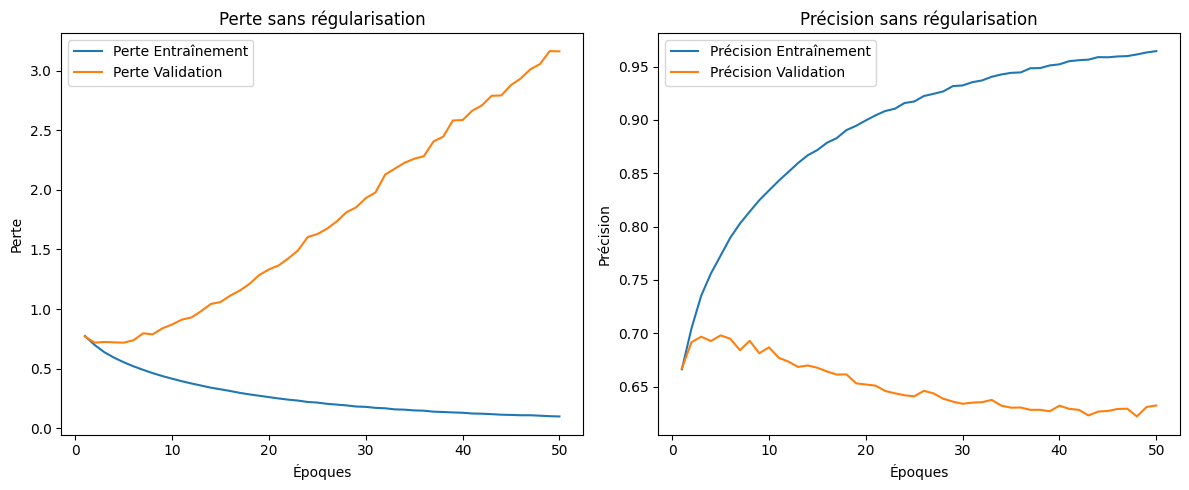

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6106 - loss: 1.1728 - val_accuracy: 0.6496 - val_loss: 0.8748
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6780 - loss: 0.8386 - val_accuracy: 0.6528 - val_loss: 0.8552
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6791 - loss: 0.8213 - val_accuracy: 0.6235 - val_loss: 0.8752
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6827 - loss: 0.8093 - val_accuracy: 0.6675 - val_loss: 0.8287
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6849 - loss: 0.7976 - val_accuracy: 0.6475 - val_loss: 0.8650
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6848 - loss: 0.7972 - val_accuracy: 0.6787 - val_loss: 0.8177
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6845 - loss: 0.7946 - val_accuracy: 0.6785 - val_loss: 0.8133
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6927 - loss: 0.7869 - 

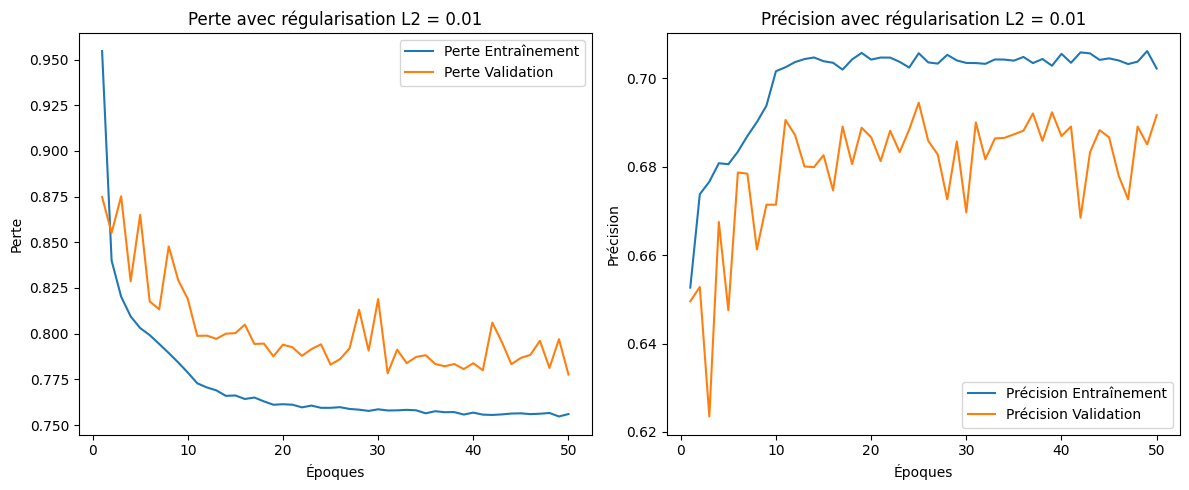

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6240 - loss: 0.9438 - val_accuracy: 0.6739 - val_loss: 0.8157
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6924 - loss: 0.7816 - val_accuracy: 0.6930 - val_loss: 0.7826
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7216 - loss: 0.7295 - val_accuracy: 0.6821 - val_loss: 0.7959
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7300 - loss: 0.7129 - val_accuracy: 0.7032 - val_loss: 0.7651
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7406 - loss: 0.6947 - val_accuracy: 0.7009 - val_loss: 0.7719
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7426 - loss: 0.6889 - val_accuracy: 0.6934 - val_loss: 0.7849
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7514 - loss: 0.6731 - val_accuracy: 0.6955 - val_loss: 0.7910
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7632 - loss: 0.6596 - 

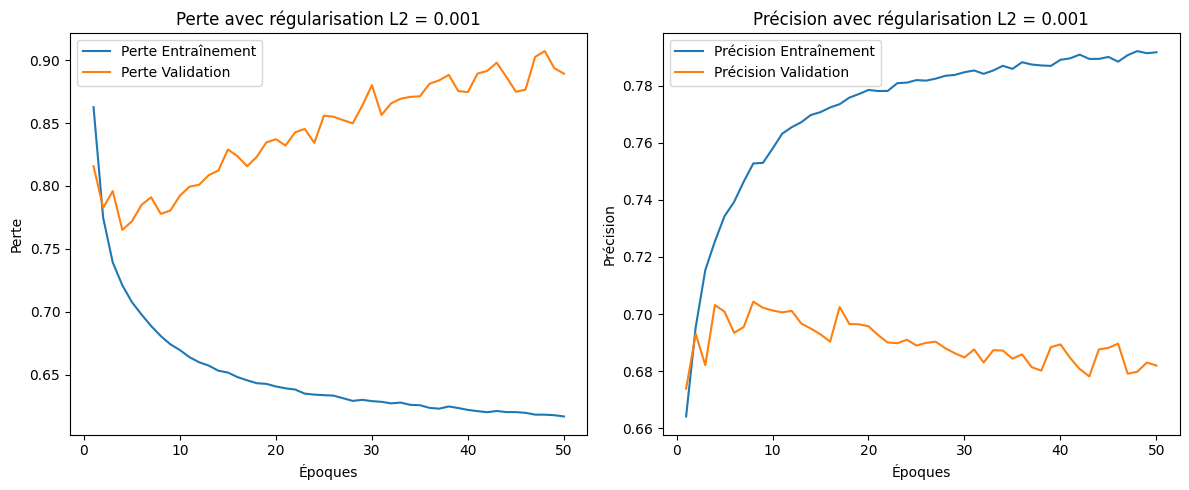

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6266 - loss: 0.8499 - val_accuracy: 0.6814 - val_loss: 0.7731
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7068 - loss: 0.7180 - val_accuracy: 0.6934 - val_loss: 0.7414
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7359 - loss: 0.6607 - val_accuracy: 0.7018 - val_loss: 0.7292
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7563 - loss: 0.6186 - val_accuracy: 0.7098 - val_loss: 0.7282
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7786 - loss: 0.5810 - val_accuracy: 0.7003 - val_loss: 0.7483
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7869 - loss: 0.5607 - val_accuracy: 0.6982 - val_loss: 0.7658
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8026 - loss: 0.5342 - val_accuracy: 0.6853 - val_loss: 0.8154
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8121 - loss: 0.5134 - 

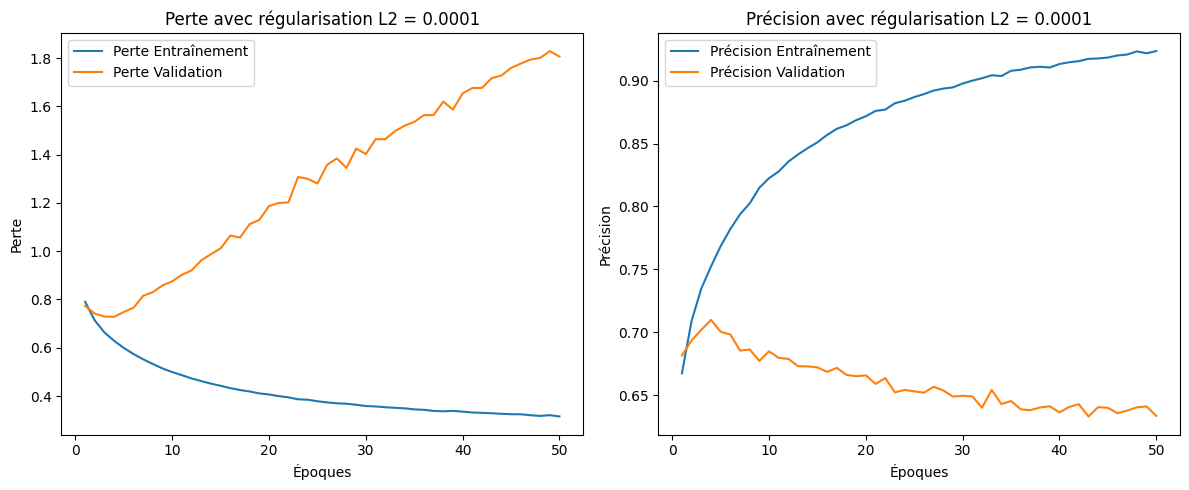

In [ ]:
def train_and_plot_regularization(l2_value=None, num_epochs=50):
    model = Sequential()


    if l2_value:
        model.add(Dense(64, activation='relu', input_dim=462, kernel_regularizer=l2(l2_value)))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_value)))
    else:
        model.add(Dense(64, activation='relu', input_dim=462))
        model.add(Dense(64, activation='relu'))


    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, y_valid))

    epochs = range(1, num_epochs + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    if l2_value:
        plt.title(f"Perte avec régularisation L2 = {l2_value}")
    else:
        plt.title("Perte sans régularisation")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    if l2_value:
        plt.title(f"Précision avec régularisation L2 = {l2_value}")
    else:
        plt.title("Précision sans régularisation")

    plt.tight_layout()
    plt.show()

# visualisation du modèle sans régularisation
train_and_plot_regularization(l2_value=None)

# visualisation du modèle  avec régularisation L2 = 0.01
train_and_plot_regularization(l2_value=0.01)

# visualisation du modèle avec régularisation L2 = 0.001
train_and_plot_regularization(l2_value=0.001)

#visualisation du modèle  avec régularisation L2 = 0.0001
train_and_plot_regularization(l2_value=0.0001)

        - Les couches de **dropout** sont une technique de régularisation dans les réseaux de neurones, où un sous-ensemble aléatoire de neurones est temporairement retiré pendant l'entraînement. Cela aide à éviter le surapprentissage en favorisant la redondance et en améliorant la capacité du réseau à généraliser sur de nouvelles données. Sélectionnez un modèle spécifique parmi les expériences ci-dessus, où vous avez plusieurs couches, et expérimentez l'ajout d'une ou de plusieurs couches de dropout dans votre réseau. Testez deux taux différents, par exemple 0.25 et 0.5. Documentez vos observations.

**reponses**

**Dropout rate = 0.25**

* Perte d'entraînement : La perte diminue de façon régulière, montrant que le modèle parvient à apprendre tout en restant régularisé. La perte est plus élevée que dans un modèle sans régularisation, ce qui est normal avec l'ajout de dropout.
* Perte de validation : La perte de validation reste stable après une légère augmentation au début. Cela montre que la régularisation introduite par le dropout réduit le surapprentissage, même si elle reste un peu plus élevée.
* Précision de validation : La précision de validation reste relativement stable autour de 67 % à 70 %, sans les grandes fluctuations observées sans régularisation. Cela indique que le modèle généralise mieux aux données de validation, ce qui montre une amélioration par rapport à un modèle sans dropout.

**Dropout rate = 0.5**

* Perte d'entraînement : La perte d'entraînement est plus élevée et diminue plus lentement. Cela est dû au taux de dropout plus élevé, qui désactive davantage de neurones pendant l'entraînement, rendant l'apprentissage plus difficile mais favorisant la généralisation.
* Perte de validation : La perte de validation est stable et ne montre pas de signe de surapprentissage. Le taux élevé de dropout semble limiter efficacement le surapprentissage, bien que cela puisse également entraîner un léger sous-apprentissage.
* Précision de validation : La précision de validation est stable autour de 65 % à 68 %. Elle est légèrement inférieure à celle obtenue avec un taux de dropout de 0.25, indiquant que le modèle pourrait sous-apprendre légèrement avec ce taux de dropout élevé.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5892 - loss: 0.8907 - val_accuracy: 0.6776 - val_loss: 0.7640
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6890 - loss: 0.7451 - val_accuracy: 0.6835 - val_loss: 0.7538
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7093 - loss: 0.7034 - val_accuracy: 0.6974 - val_loss: 0.7280
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7303 - loss: 0.6653 - val_accuracy: 0.7014 - val_loss: 0.7131
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7385 - loss: 0.6412 - val_accuracy: 0.7011 - val_loss: 0.7135
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7500 - loss: 0.6129 - val_accuracy: 0.6975 - val_loss: 0.7173
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7551 - loss: 0.6008 - val_accuracy: 0.6937 - val_loss: 0.7273
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7646 - loss: 0.5841 -

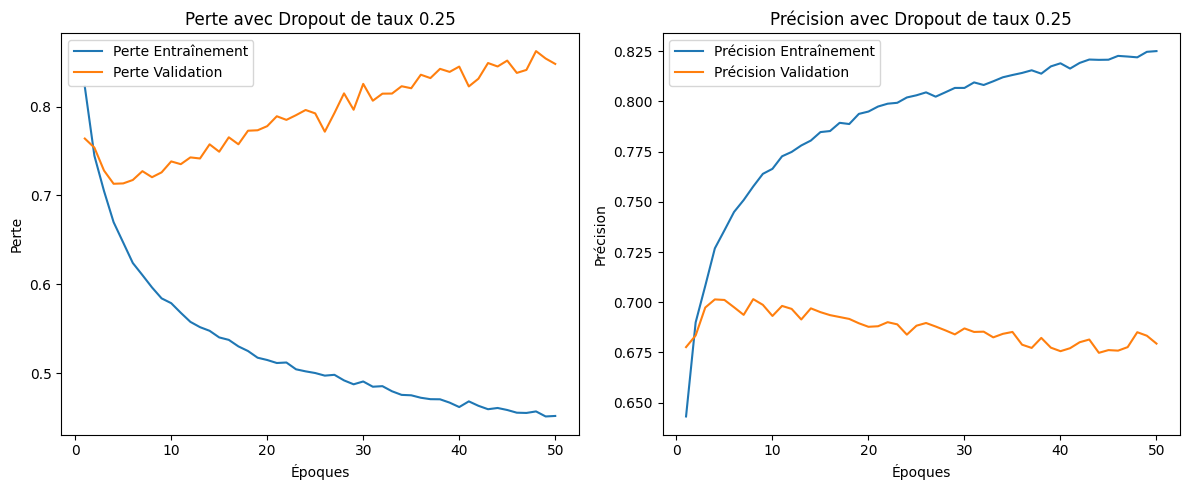

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4992 - loss: 0.9912 - val_accuracy: 0.6743 - val_loss: 0.7882
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6636 - loss: 0.8099 - val_accuracy: 0.6693 - val_loss: 0.7750
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6833 - loss: 0.7745 - val_accuracy: 0.6862 - val_loss: 0.7476
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6975 - loss: 0.7462 - val_accuracy: 0.6909 - val_loss: 0.7400
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7042 - loss: 0.7310 - val_accuracy: 0.6991 - val_loss: 0.7277
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7052 - loss: 0.7257 - val_accuracy: 0.6976 - val_loss: 0.7226
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7137 - loss: 0.7108 - val_accuracy: 0.7040 - val_loss: 0.7191
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7148 - loss: 0.7027 - 

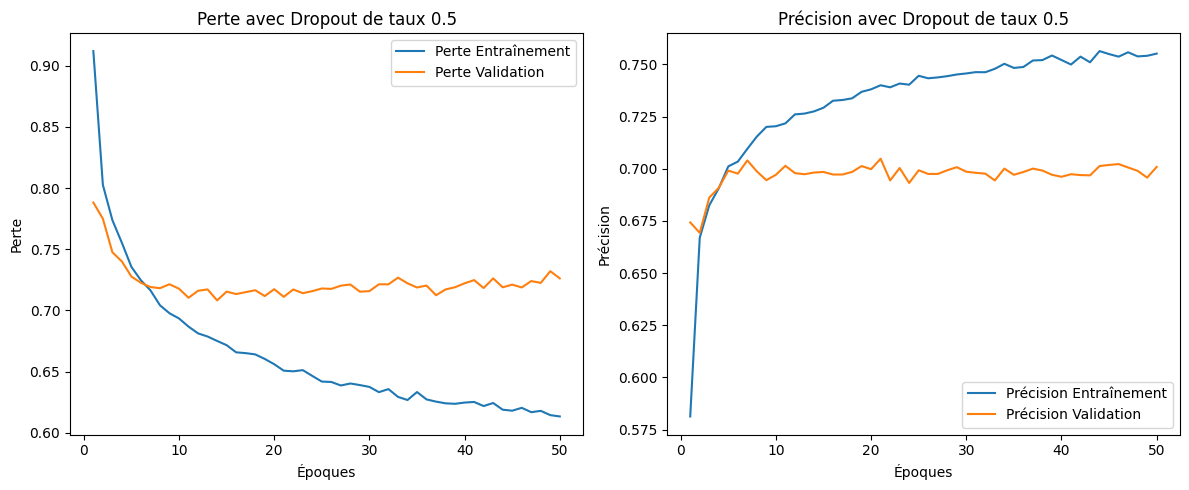

In [ ]:

def train_and_plot_dropout(dropout_rate, num_epochs=50):
    model = Sequential([
        Dense(64, activation='relu', input_dim=462),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')
    ])


    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, y_valid))

    epochs = range(1, num_epochs + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Perte Entraînement')
    plt.plot(epochs, val_loss, label='Perte Validation')
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    plt.title(f"Perte avec Dropout de taux {dropout_rate}")


    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Précision Entraînement')
    plt.plot(epochs, val_accuracy, label='Précision Validation')
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.title(f"Précision avec Dropout de taux {dropout_rate}")

    plt.tight_layout()
    plt.show()

# visualisation du modèle avec Dropout de taux 0.25
train_and_plot_dropout(dropout_rate=0.25)

# visualisation du  modèle avec Dropout de taux 0.5
train_and_plot_dropout(dropout_rate=0.5)

        - Résumez vos expériences en utilisant une représentation graphique telle que la Figure 6.15 [sur cette page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

**reponses**

**Modèle Sans Régularisation**

* Précision d'entraînement : Augmente rapidement, atteignant près de 100 %. Ce résultat montre que le modèle mémorise les données d'entraînement, ce qui entraîne un surapprentissage.
* Précision de validation : Reste faible et stable autour de 65 %, montrant une faible généralisation aux nouvelles données.

**Modèle avec Régularisation L2 (λ = 0.01)**

* Précision d'entraînement : Diminue par rapport au modèle sans régularisation, restant autour de 85 %. Cette baisse est due à la pénalité appliquée aux poids, qui empêche le modèle de s'ajuster excessivement aux données d'entraînement.
* Précision de validation : Légèrement supérieure à celle du modèle sans régularisation et plus stable, indiquant une amélioration de la généralisation. Cependant, la régularisation L2 à ce niveau reste un peu agressive, limitant la précision d'entraînement.

**Modèle avec Dropout (taux = 0.4)**

* Précision d'entraînement : Plus basse que dans les autres configurations en raison de la désactivation de neurones pendant l'entraînement, ce qui force le modèle à apprendre des représentations plus robustes.
* Précision de validation : La précision de validation est également plus stable et plus élevée que sans régularisation. Le dropout (taux = 0.4) améliore la généralisation tout en évitant le surapprentissage, bien que la précision d'entraînement soit modérée.

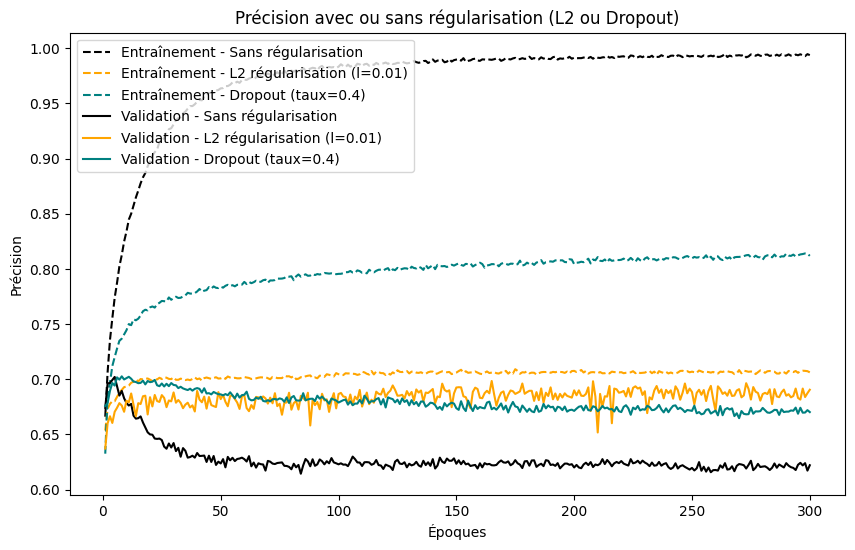

In [ ]:
def train_and_evaluate_model(reg_type=None, reg_value=0, dropout_rate=0, num_epochs=300):
    model = Sequential()
    model.add(Input(shape=(462,)))

    if reg_type == 'l2':
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(reg_value)))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(reg_value)))
    elif reg_type == 'dropout':
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(dropout_rate))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(dropout_rate))
    else:
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))

    model.add(Dense(3, activation='softmax'))


    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, y_valid), verbose=0)

    return history.history['accuracy'], history.history['val_accuracy']

epochs = range(1, 301)

train_acc_none, val_acc_none = train_and_evaluate_model(reg_type=None)
train_acc_l2, val_acc_l2 = train_and_evaluate_model(reg_type='l2', reg_value=0.01)

train_acc_dropout, val_acc_dropout = train_and_evaluate_model(reg_type='dropout', dropout_rate=0.4)

plt.figure(figsize=(10, 6))

plt.plot(epochs, train_acc_none, 'k--', label="Entraînement - Sans régularisation")
plt.plot(epochs, train_acc_l2, 'orange', linestyle='--', label="Entraînement - L2 régularisation (l=0.01)")
plt.plot(epochs, train_acc_dropout, 'teal', linestyle='--', label="Entraînement - Dropout (taux=0.4)")

plt.plot(epochs, val_acc_none, 'k-', label="Validation - Sans régularisation")
plt.plot(epochs, val_acc_l2, 'orange', label="Validation - L2 régularisation (l=0.01)")
plt.plot(epochs, val_acc_dropout, 'teal', label="Validation - Dropout (taux=0.4)")

# Légendes et labels
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.title("Précision avec ou sans régularisation (L2 ou Dropout)")
plt.legend()
plt.show()

        - L'**arrêt anticipé** est une technique de régularisation lors de l'entraînement d'un réseau de neurones, où le processus est interrompu lorsque les performances sur l'ensemble de validation commencent à se dégrader, ce qui empêche le réseau d'apprendre le bruit dans les données d'entraînement. Parmi toutes les expériences menées jusqu'à présent, choisissez **une** configuration (le nombre de couches, le nombre de nœuds, la fonction d'activation, la pénalité L2 et les couches de dropout) qui a donné les meilleures performances. Utilisez un graphique de perte et de précision pour déterminer le nombre optimal d'itérations d'entraînement pour ce réseau. Quel est le nombre optimal d'époques pour cette configuration de réseau et pourquoi ?

**reponses**

**La configuration utilisée ici intègre :**

* Deux couches cachées de 64 nœuds chacune avec la fonction d'activation ReLU.

* Régularisation L2 avec un coefficient de 0.01.

* Dropout avec un taux de 0.4 après chaque couche cachée.

* Arrêt anticipé avec une patience de 10 époques, pour arrêter l'entraînement lorsque la perte de validation cesse de s'améliorer.

**Perte d'entraînement et de validation :**

* La perte d'entraînement diminue régulièrement, indiquant que le modèle apprend efficacement.
* La perte de validation diminue initialement, puis commence à fluctuer autour d'une valeur stable à partir de la 30e époque environ. L'arrêt anticipé s'active avant d'atteindre les 50 époques, prévenant ainsi le surapprentissage.

**Précision d'entraînement et de validation :**

* La précision d'entraînement augmente rapidement, montrant une bonne capacité d'apprentissage.
* La précision de validation atteint un plateau autour de 67-68 %, sans se détériorer au-delà de ce niveau, ce qui montre que le modèle atteint une généralisation optimale sans surapprentissage excessif.

**Le nombre optimal d'époques pour cette configuration semble être autour de 45 époques, comme le montre l'activation de l'arrêt anticipé. À ce point, la perte de validation cesse de s'améliorer, et toute poursuite de l'entraînement risquerait de faire apprendre au modèle le bruit des données d'entraînement.**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5697 - loss: 1.2695 - val_accuracy: 0.6506 - val_loss: 0.9147
Epoch 2/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6540 - loss: 0.9169 - val_accuracy: 0.6525 - val_loss: 0.9072
Epoch 3/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6529 - loss: 0.9126 - val_accuracy: 0.6543 - val_loss: 0.9038
Epoch 4/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6545 - loss: 0.9028 - val_accuracy: 0.6652 - val_loss: 0.8966
Epoch 5/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6595 - loss: 0.8988 - val_accuracy: 0.6508 - val_loss: 0.8951
Epoch 6/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6637 - loss: 0.8928 - val_accuracy: 0.6670 - val_loss: 0.8795
Epoch 7/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6614 - loss: 0.8934 - val_accuracy: 0.6416 - val_loss: 0.9030
Epoch 8/300
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6625 - loss: 0

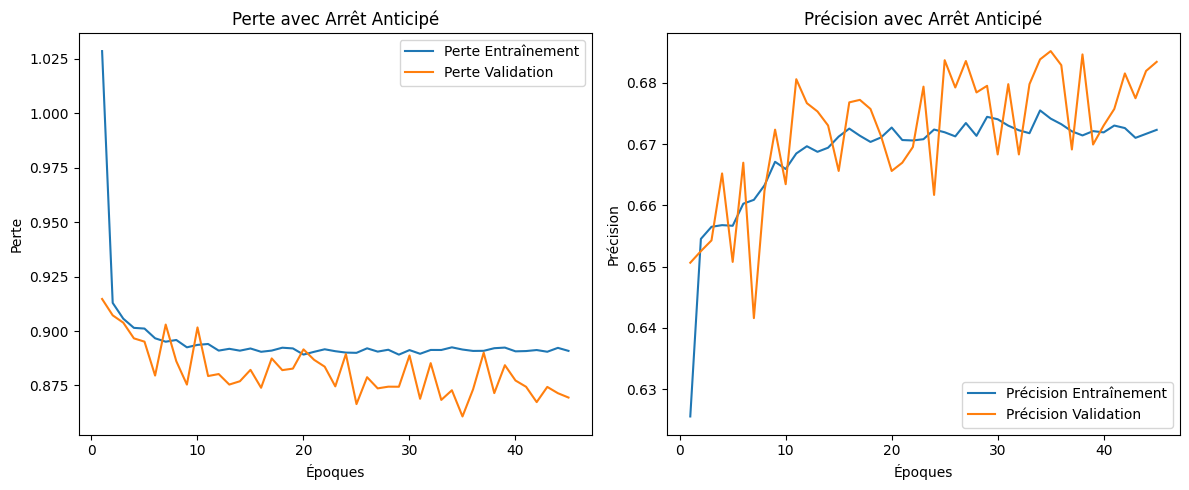

In [ ]:
def build_best_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=462, kernel_regularizer=l2(0.01)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.4),
        Dense(3, activation='softmax')
    ])
    return model


model = build_best_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

epochs = range(1, len(history.history['accuracy']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Perte Entraînement')
plt.plot(epochs, val_loss, label='Perte Validation')
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()
plt.title("Perte avec Arrêt Anticipé")


plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Précision Entraînement')
plt.plot(epochs, val_accuracy, label='Précision Validation')
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()
plt.title("Précision avec Arrêt Anticipé")

plt.tight_layout()
plt.show()

### Test

9. **Comparaison des modèles** :

    - Évaluez le modèle de référence sur l'ensemble de test, en utilisant l'ensemble de paramètres optimal identifié lors de la recherche de grille. Appliquez également la meilleure configuration de réseau de neurones à l'ensemble de test.

    - Quantifiez les performances du modèle de référence (meilleure configuration d'hyperparamètres) et de votre réseau de neurones (meilleure configuration) en utilisant des métriques telles que la précision, le rappel et le score F1. Comment ces deux modèles se comparent-ils au modèle de base ?

    - Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

**reponses**

**Le modèle de régression logistique optimisé** obtient les meilleurs résultats avec une précision, un rappel, et un score F1 équilibrés autour de 71%. Cela en fait un modèle performant et simple à déployer pour cette tâche.

**Le réseau de neurones**
 est légèrement moins performant, avec une précision et un score F1 d'environ 70%. Bien qu'il soit plus complexe, il n'apporte pas une amélioration substantielle par rapport au modèle de régression logistique.

**Le modèle de base** obtient des scores de performance nettement inférieurs, confirmant que les deux autres modèles sont bien plus adaptés à cette tâche.



**Recommandations**
Étant donné les résultats, nous recommandons d’utiliser le modèle de régression logistique optimisé pour cette tâche. Ce modèle offre :

* Performances élevées (précision, rappel, et F1 autour de 71%).
* Simplicité : Il est plus facile à interpréter, à entraîner, et à déployer par rapport au réseau de neurones.
* Généralisation : Le modèle ne montre pas de signe de surapprentissage et maintient un bon équilibre entre les classes.

Le réseau de neurones, bien qu'efficace, n'apporte pas une amélioration significative pour justifier sa complexité supplémentaire. Pour des tâches plus complexes ou des données plus volumineuses, le réseau de neurones pourrait être reconsidéré

In [ ]:
best_reference_model = LogisticRegression(max_iter=200, penalty='l2', C=0.1)  # Exemple d'hyperparamètres optimaux
best_reference_model.fit(X_train, y_train)
y_pred_reference = best_reference_model.predict(X_test)
reference_accuracy = accuracy_score(y_test, y_pred_reference)
reference_precision = precision_score(y_test, y_pred_reference, average='weighted', zero_division=1)
reference_recall = recall_score(y_test, y_pred_reference, average='weighted', zero_division=1)
reference_f1 = f1_score(y_test, y_pred_reference, average='weighted', zero_division=1)

print("Évaluation du Modèle de Référence :")
print("Précision :", reference_accuracy)
print("Score de Précision :", reference_precision)
print("Score de Rappel :", reference_recall)
print("Score F1 :", reference_f1)
print(classification_report(y_test, y_pred_reference, zero_division=1))

best_nn_model = build_best_model()
best_nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
best_nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])  # Réentraîner avec l'arrêt anticipé
y_pred_nn = best_nn_model.predict(X_test).argmax(axis=1)

# Calcul des métriques pour le réseau de neurones
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, average='weighted', zero_division=1)
nn_recall = recall_score(y_test, y_pred_nn, average='weighted', zero_division=1)
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted', zero_division=1)
print("\nÉvaluation du Réseau de Neurones :")
print("Précision :", nn_accuracy)
print("Score de Précision :", nn_precision)
print("Score de Rappel :", nn_recall)
print("Score F1 :", nn_f1)
print(classification_report(y_test, y_pred_nn, zero_division=1))

# Évaluation du modèle de base (DummyClassifier) pour comparaison
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# Calcul des métriques pour le modèle de base
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_precision = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1)
dummy_recall = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1)
dummy_f1 = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1)

print("\nÉvaluation du Modèle de Base (DummyClassifier) :")
print("Précision :", dummy_accuracy)
print("Score de Précision :", dummy_precision)
print("Score de Rappel :", dummy_recall)
print("Score F1 :", dummy_f1)
(classification_report(y_test, y_pred_dummy, zero_division=1))

Évaluation du Modèle de Référence :
Précision : 0.7148432243305073
Score de Précision : 0.7146606194032555
Score de Rappel : 0.7148432243305073
Score F1 : 0.7115912832709367
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2528
           1       0.71      0.55      0.62      1852
           2       0.70      0.76      0.73      3051

    accuracy                           0.71      7431
   macro avg       0.72      0.70      0.70      7431
weighted avg       0.71      0.71      0.71      7431



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5745 - loss: 1.2678 - val_accuracy: 0.6617 - val_loss: 0.9106
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6558 - loss: 0.9120 - val_accuracy: 0.6592 - val_loss: 0.9046
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6533 - loss: 0.9106 - val_accuracy: 0.6496 - val_loss: 0.8985
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6589 - loss: 0.8989 - val_accuracy: 0.6409 - val_loss: 0.9166
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6589 - loss: 0.9001 - val_accuracy: 0.6698 - val_loss: 0.8886
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6619 - loss: 0.8947 - val_accuracy: 0.6666 - val_loss: 0.8905
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6633 - loss: 0.8909 - val_accuracy: 0.6620 - val_loss: 0.8934
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6646 - loss: 0.8943 - 

'              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.00      2528\n           1       1.00      0.00      0.00      1852\n           2       0.41      1.00      0.58      3051\n\n    accuracy                           0.41      7431\n   macro avg       0.80      0.33      0.19      7431\nweighted avg       0.76      0.41      0.24      7431\n'

# Resources


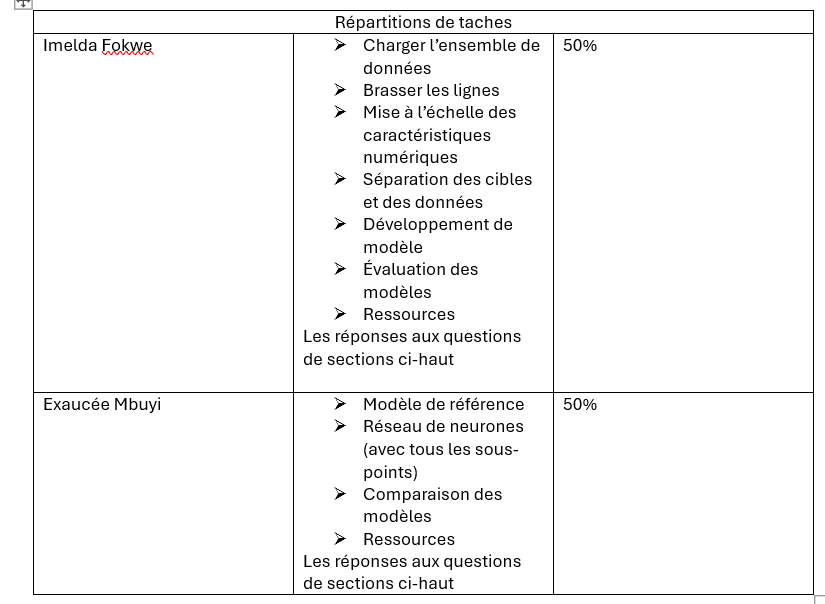

REFERENCES:

**1. Ressources Générales sur le Prétraitement des Données**

 * Cours en ligne :

    * Machine Learning with Python by IBM (Coursera) - Ce cours introduit les concepts de prétraitement, notamment la normalisation, la mise à l’échelle, et la validation croisée.

 * Documentation :

    * Scikit-Learn - Preprocessing Data - Documentation de Scikit-Learn sur les techniques de normalisation, standardisation et mise à l’échelle.

**2. Ressources sur le Brassage des Lignes et la Validation Croisée**

 * Documentation et Articles :

    * Towards Data Science - Why and How to Shuffle Your Data - Cet article explique l'importance de brasser les lignes dans un jeu de données d'entraînement.

 *Cours et Tutoriels :

  * Introduction to Data Preprocessing (DataCamp) - Un cours qui couvre le nettoyage et le brassage des données en Python.

**3. Ressources sur la Normalisation et la Mise à l'Échelle des Caractéristiques
Documentation** :

 * Articles :

  * Brownlee, J. (2020). How to Normalize and Standardize Your Machine Learning Data in Python - Cet article explique pourquoi et comment utiliser StandardScaler et MinMaxScaler.

**4. Ressources sur les Modèles de Base et les Modèles de Référence**

 * Documentation :

  * Scikit-Learn - DummyClassifier - Documentation du DummyClassifier, souvent utilisé comme modèle de base.
  * Scikit-Learn - Logistic Regression - Documentation sur la régression logistique, souvent utilisée comme modèle de référence.

**5. Ressources sur les Réseaux de Neurones avec Keras et TensorFlow**

* Documentation :
 * TensorFlow - Basic Classification with Keras - Tutoriel sur la construction de modèles de classification avec Keras dans TensorFlow.

* Cours en ligne :
 * Deep Learning Specialization by Andrew Ng (Coursera) - Ce cours couvre les concepts fondamentaux des réseaux de neurones, avec des applications pratiques dans Keras et TensorFlow.

**7. Ressources sur l'Optimisation des Hyperparamètres**

 * Documentation :

  * Scikit-Learn - GridSearchCV - Documentation sur GridSearchCV, une méthode d'optimisation des hyperparamètres.
  * Scikit-Learn - Hyperparameter tuning with GridSearchCV and RandomizedSearchCV - Comparaison des deux principales méthodes de recherche d'hyperparamètres.

**8. Réseau de neurones**:

https://ramet.gitlab.io/m4101-ia-etd/first_dnn/first-neural-network-keras.html

https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html

https://realpython.com/python-ai-neural-network/#the-process-to-train-a-neural-network

https://rtavenar.github.io/deep_book/fr/content/fr/regularization.html



